<a href="https://colab.research.google.com/github/GRUPPE-BINA24/Datenspeicher/blob/main/BINA_CaseStudy_Wohnungsmarkt_Schweiz_Bernhardsgr%C3%BCtter_Galliker_Moos_Pauger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse der Wohnungsmärkte in der Schweiz (2012-2023)



---

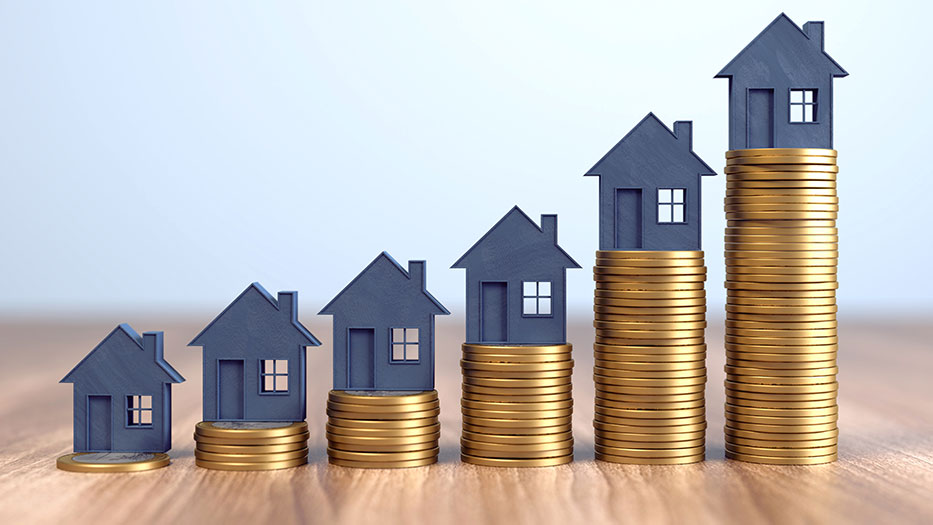

Quelle: AdobeStock | fotomek

##1) Ausgangslage
In diesem Jupyter Notebook untersuchen wir die Entwicklung der Wohnungsmieten und die Dynamik der Leerstände in der Schweiz über die letzten Jahrzehnte. Unser Fokus liegt auf der Zeitperiode von 2012 bis 2022 für die Mietpreise und von 1995 bis 2023 für die leerstehenden Wohnungen. Diese Analyse beinhaltet die Betrachtung regionaler Unterschiede, insbesondere auf Kantonsebene, und die Untersuchung möglicher Korrelationen zwischen den Mieten, den Leerständen und dem hypothekarischen Referenzzinssatz.


### Zielsetzungen

1. **Entwicklung der Mietpreise (2012-2022):** Untersuchung der Trends in den Wohnungsmieten auf nationaler und kantonaler Ebene. Identifikation von Regionen mit signifikanten Preissteigerungen oder -senkungen.
   
2. **Korrelation mit dem hypothekarischen Referenzzinssatz:** Analyse der Beziehung zwischen den Mietpreisen und dem hypothekarischen Referenzzinssatz, um potenzielle Einflüsse auf die Mietpreisentwicklung zu erkennen.

3. **Leerstehende Wohnungen (1995-2023):** Untersuchung der Entwicklung leerstehender Wohnungen in der Schweiz, inklusive regionaler Unterschiede. Identifikation von Trends und möglichen Ursachen für Veränderungen im Zeitverlauf.

4. **Zusammenhang zwischen Mieten und Leerständen:** Analyse der Beziehung zwischen den Wohnungsmieten und den Leerständen, um Einblicke in das Angebot-Nachfrage-Verhältnis auf dem Wohnungsmarkt zu gewinnen.

### Datenquellen

Die Analyse stützt sich auf mehrere Datenquellen:

- **Mietpreisdaten:** Diese Daten sollten Informationen zu den durchschnittlichen Mietpreisen pro Quadratmeter nach Kantonen und Jahren enthalten.
- **Leerstandsdaten:** Daten über die Anzahl leerstehender Wohnungen, ebenfalls aufgeschlüsselt nach Kantonen und Jahren.
- **Hypothekarischer Referenzzinssatz:** Historische Daten zum Referenzzinssatz, der für die Berechnung von Mietzinsanpassungen in der Schweiz verwendet wird.

### Methodik

1. **Datenbeschaffung und -bereinigung:** Importieren, Überprüfen und Bereinigen der Daten, um sie für die Analyse vorzubereiten.
   
2. **Explorative Datenanalyse (EDA):** Erste Untersuchung der Daten durch Visualisierungen und deskriptive Statistiken, um Trends und Muster zu identifizieren.
   
3. **Tiefere Analyse:**
   - **Mietpreise:** Anwendung statistischer Modelle, um die Entwicklung der Mietpreise zu verstehen und kantonale Unterschiede hervorzuheben.
   - **Leerstände:** Analyse der Leerstandsraten im zeitlichen Verlauf und nach Regionen.
   - **Korrelationsanalyse:** Einsatz von Korrelationskoeffizienten und möglicherweise multivariaten Analysen, um Beziehungen zwischen den Mietpreisen, den Leerständen und dem Referenzzinssatz zu untersuchen.

### Struktur des Notebooks

1. **Einleitung und Zielsetzung**
2. **Datenvorbereitung und -analyse**

  2a. **Entwicklung der Mietpreise (2012-2022)**

  2b. **Korrelation der Mietpreise mit dem hypothekarischen Referenzzinssatz**

  2c. **Entwicklung der leerstehenden Wohnungen (1995-2023)**

  2d. **Korrelation der Mietpreise mit den Leeständen**
3. **Zusammenfassung und Schlussfolgerungen**

### Erwartete Ergebnisse

- Ein umfassendes Bild der Entwicklungen auf dem Schweizer Wohnungsmarkt im untersuchten Zeitraum.
- Einblicke in die regionale Dynamik der Wohnungsmärkte.
- Verständnis der Einflüsse des hypothekarischen Referenzzinssatzes auf die Mietpreisentwicklung.
- Identifikation von Mustern, die die Entwicklung der Leerstände erklären könnten.



---

##2) Datenvorbereitung- und analyse

###2.1 Entwicklung der Mietpreise (2012-2022)

**Beschreibung der Daten**:
Bei den Daten handelt es sich um die Mietpreisentwicklung für 3-Zimmerwohnungen in verschiedenen Schweizer Kantonen von 2012 bis 2022. Die Befragten gaben Auskunft zu ihrer Person, zum Haushalt, zu den Haushaltsmitgliedern sowie zur Wohnsituation. Die Beträge repräsentieren die monatlichen Netto-Mietzinsen (ohne Neben- und Heizkosten) der Mieter- und Genossenschafterwohnungen.

**Datenquelle**: [Bundesamt für Statistik](https://www.bfs.admin.ch/bfs/de/home/statistiken/kataloge-datenbanken.assetdetail.30885375.html)

**Einschränkungen der Daten**: Aufgrund methodischer Änderungen ab dem Jahr 2018 im Bereich der Erhebungsmethode, der Gewichtung sowie der Detektierung von Ausreissern können die Ergebnisse nur bedingt mit den Erhebungen vor 2018 verglichen werden. Ausserdem wurde der Fragebogen 2015 angepasst, weshalb die Ergebnisse nur bedingt mit den Erhebungen vor 2015 verglichen werden können.
Die Strukturerhebung umfasst Personen ab 15 Jahren, die in einem Privathaushalt der ständigen Wohnbevölkerung leben. Nicht berücksichtigt wurden Personen, die in Kollektivhaushalten leben, Diplomaten, internationale Funktionäre sowie deren Angehörige. Vereinzelte Ergebnisse in kleinen Kantonen basieren auf einer Extrapolation mit weniger als 50 Beobachtungen und erfordern eine besonders vorsichtige Interpretation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_excel("https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreis_BERR-Zins.xlsx")
df.head()


,Kanton,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012
0,Aargau,15.9,15.8,15.7,15.5,15.6,15.1,15.1,15.0,15.5,15.5,15.2
1,Appenzell A.Rh.,13.8,14.0,13.9,13.4,12.8,12.8,12.6,13.0,13.1,12.9,12.9
2,Appenzell I.Rh.,15.9,15.2,14.0,15.7,14.4,15.0,13.2,12.9,14.1,13.7,13.9
3,Basel-Landschaft,17.4,17.3,17.2,17.0,16.9,16.7,16.3,16.3,17.0,16.5,16.9
4,Basel-Stadt,18.2,18.0,17.7,17.7,17.4,16.8,16.9,16.4,16.8,16.7,16.6


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_excel("https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreis_BERR-Zins.xlsx")
df.describe()

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,15.368304,15.225446,14.968304,14.921964,14.654107,14.539911,14.386339,14.086429,14.829286,14.643661,14.447321
std,3.697131,3.622522,3.606820,3.653510,3.589234,3.511664,3.510361,3.487179,3.521176,3.467682,3.506649
min,0.012500,0.012500,0.012500,0.015000,0.015000,0.017500,0.017500,0.020000,0.020000,0.022500,0.025000
25%,14.150000,14.000000,14.000000,13.700000,13.475000,13.500000,13.375000,13.000000,13.875000,13.575000,13.300000
50%,15.500000,15.200000,14.750000,15.000000,14.600000,14.900000,14.250000,14.100000,15.100000,15.000000,14.500000
75%,17.400000,17.325000,16.900000,17.000000,16.600000,16.700000,16.375000,16.300000,16.800000,16.525000,16.600000
max,20.300000,19.700000,19.700000,20.100000,19.800000,19.500000,20.200000,19.500000,19.900000,19.100000,19.600000


####2.1.1 Verteilungen der Kantone (Scatterplots)

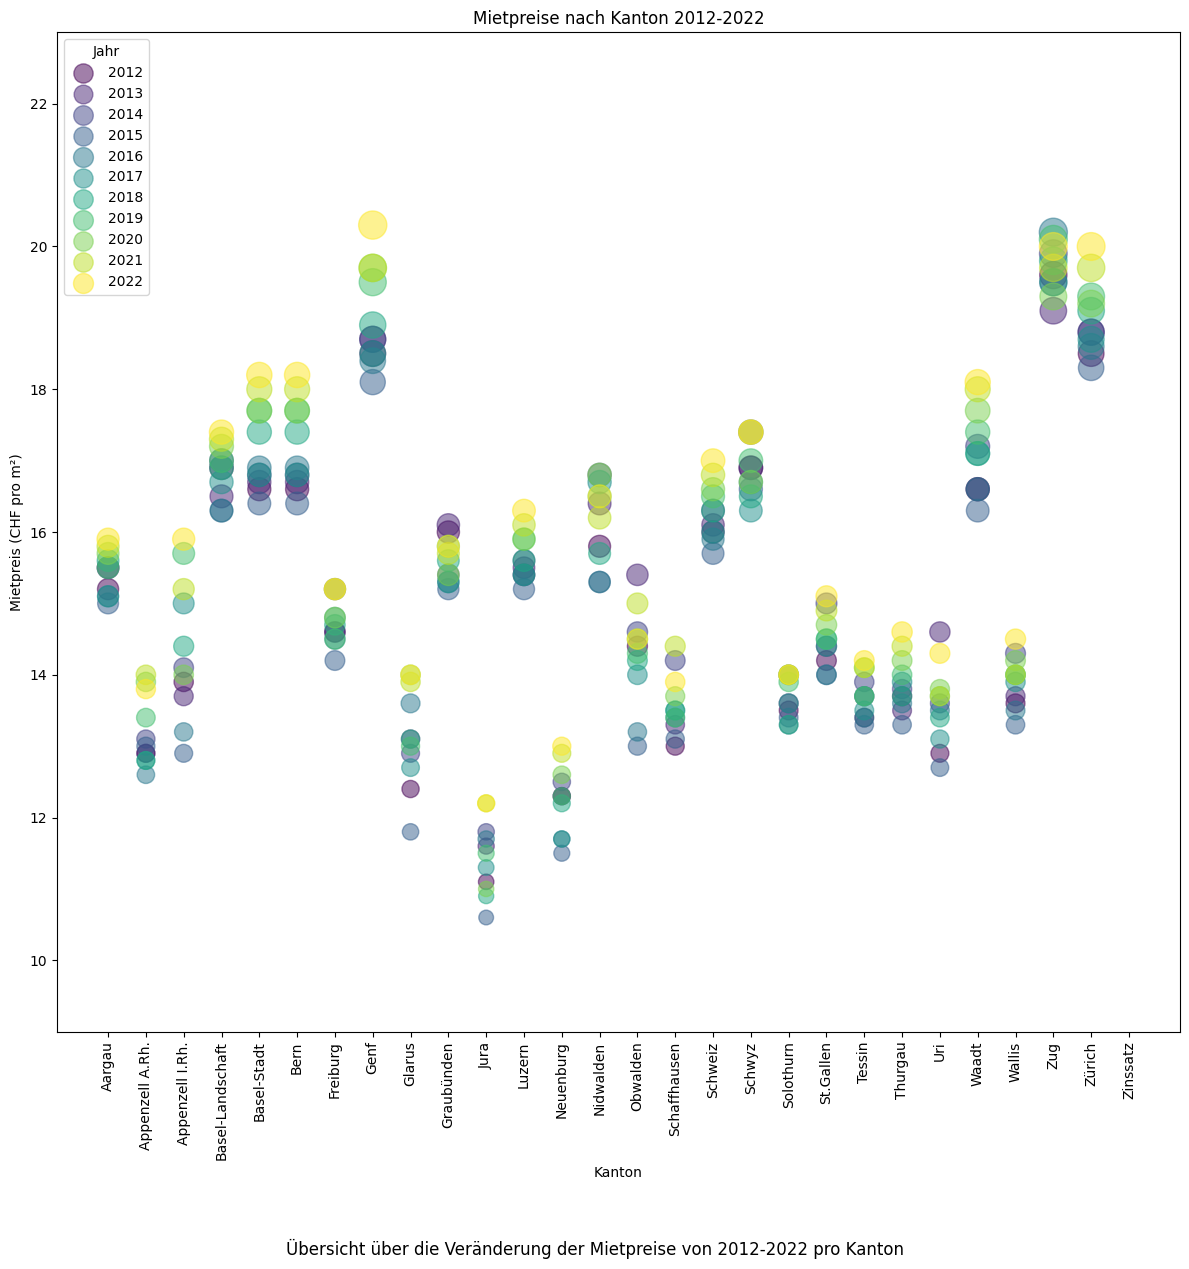

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  # For color map

# Vorannahme: 'df' ist dein DataFrame

# Erstelle den Scatterplot
plt.figure(figsize=(12, 12), facecolor='white')  # Hintergrund der Figure transparent machen

# Erstelle eine Zuordnung der Kantone zu numerischen Indizes für den Jitter-Effekt
kanton_index = {k: idx for idx, k in enumerate(df['Kanton'].unique())}
colors = plt.cm.viridis(np.linspace(0, 1, 2023-2012))  # Generiere Farben für die verschiedenen Jahre

for i, Y in enumerate(range(2012, 2023)):
    # Korrigiere die Namen der Spalten
    spaltennamen = df.columns.tolist()
    korrigierte_spaltennamen = {str(spalte): spalte for spalte in spaltennamen}

    korrigierter_kanton_name = korrigierte_spaltennamen.get('Kanton', 'Kanton')
    korrigierter_jahr_name = korrigierte_spaltennamen.get(str(Y), next((name for name in korrigierte_spaltennamen if str(Y) in str(name)), None))


    # Berechne die Größen für die Scatterplot-Punkte basierend auf Mietpreis pro m²
    punktgroessen = df[korrigierter_jahr_name]  # Dies sollte eine Serie oder Liste von Werten sein, keine einzelne Variable

    # Füge die Daten des aktuellen Jahres zum Scatterplot hinzu
    plt.scatter(df[korrigierter_kanton_name], df[korrigierter_jahr_name], color=colors[i], s=punktgroessen*punktgroessen, alpha=0.5, label=str(Y))  # Verwende die Mietpreise als Punktgrößen und mache die Punkte transparent

# Fertigstellen des Plots
plt.title('Mietpreise nach Kanton 2012-2022')
plt.xlabel('Kanton')
plt.ylabel('Mietpreis (CHF pro m²)')
plt.xticks(rotation=90)

# Berechne neue Y-Achsen-Grenzen, um diese um 20% zu strecken
y_min, y_max = 11, 21  # Ursprüngliche Grenzen
y_range = y_max - y_min  # Berechne Bereich
y_stretch = y_range * 0.2  # Berechne Streckung
plt.ylim(y_min - y_stretch, y_max + y_stretch)  # Setze die neuen, gestreckten Grenzen

plt.legend(title='Jahr')
plt.tight_layout()

# Add a title below the graphic
plt.figtext(0.5, -0.05, 'Übersicht über die Veränderung der Mietpreise von 2012-2022 pro Kanton', ha='center', fontsize=12, color='black')

plt.show()


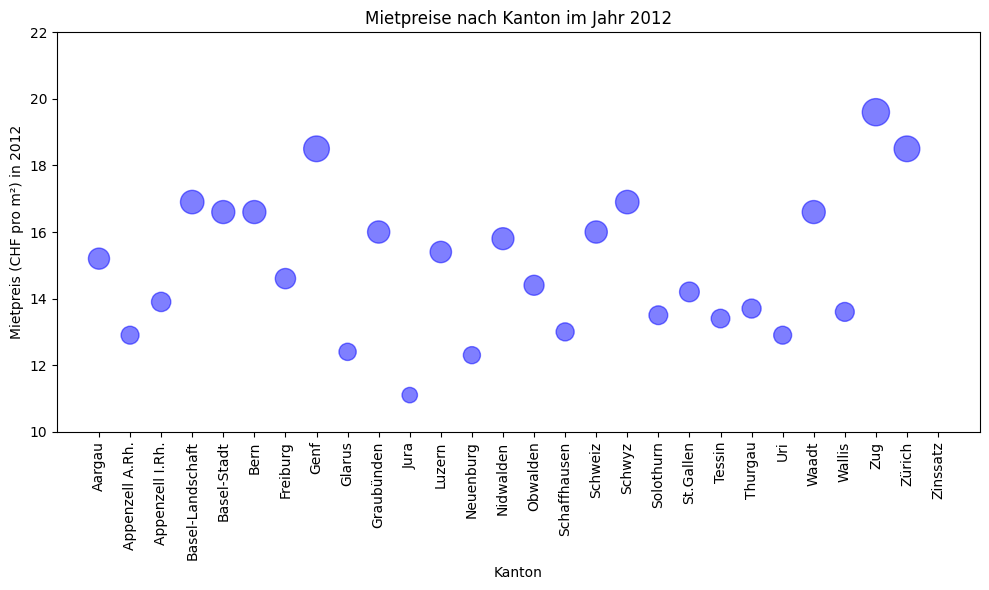

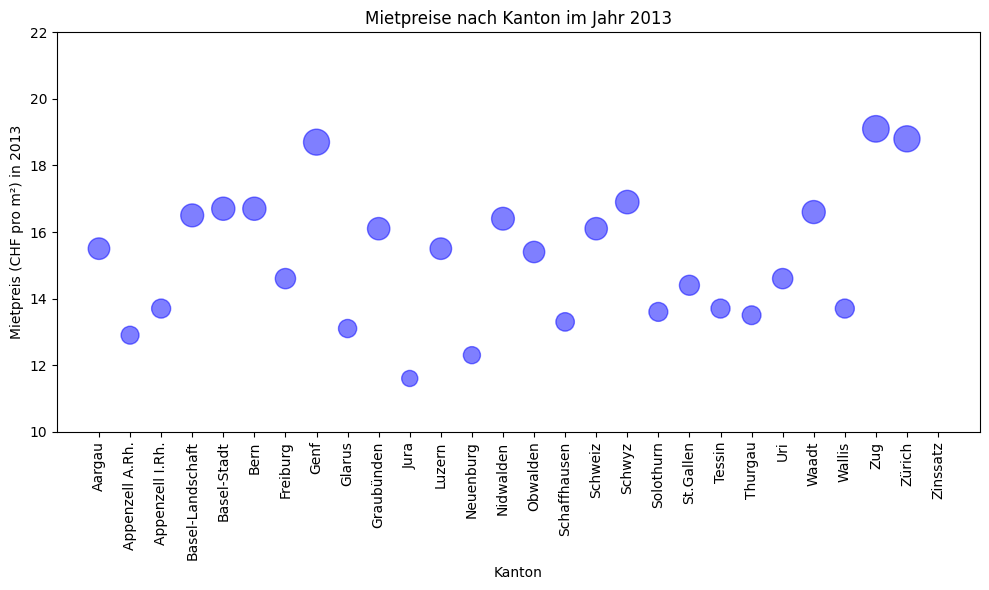

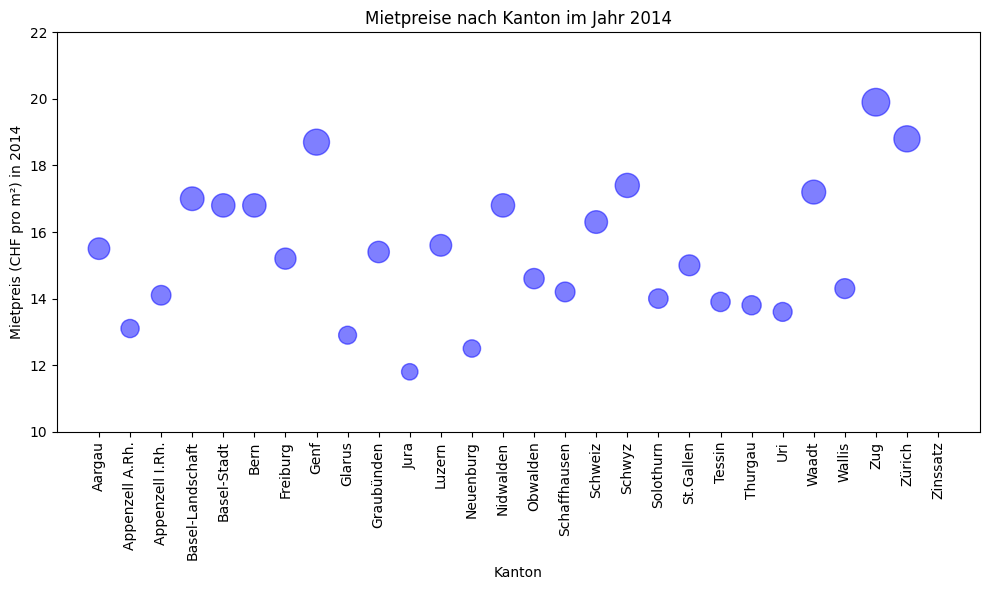

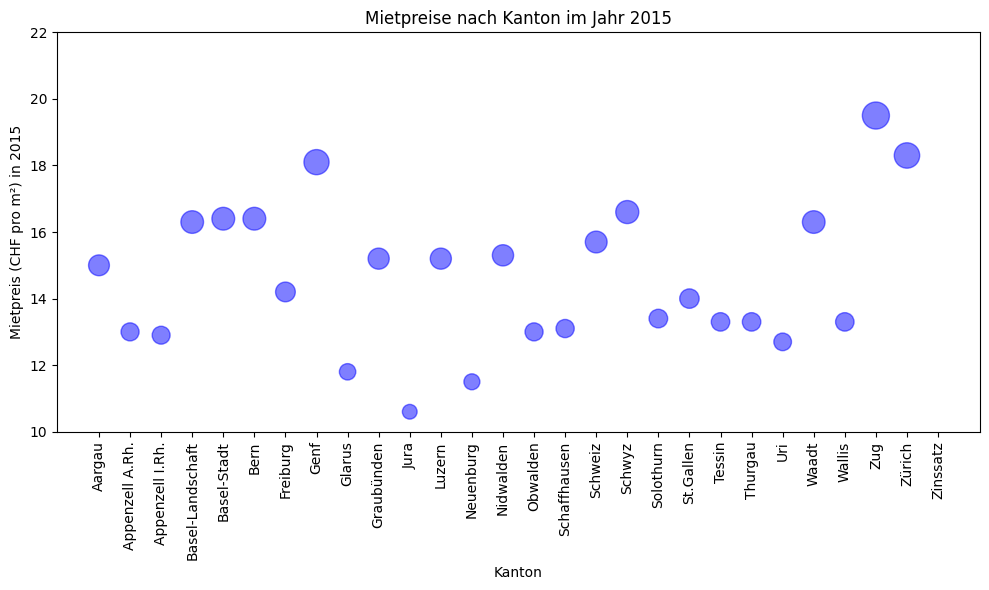

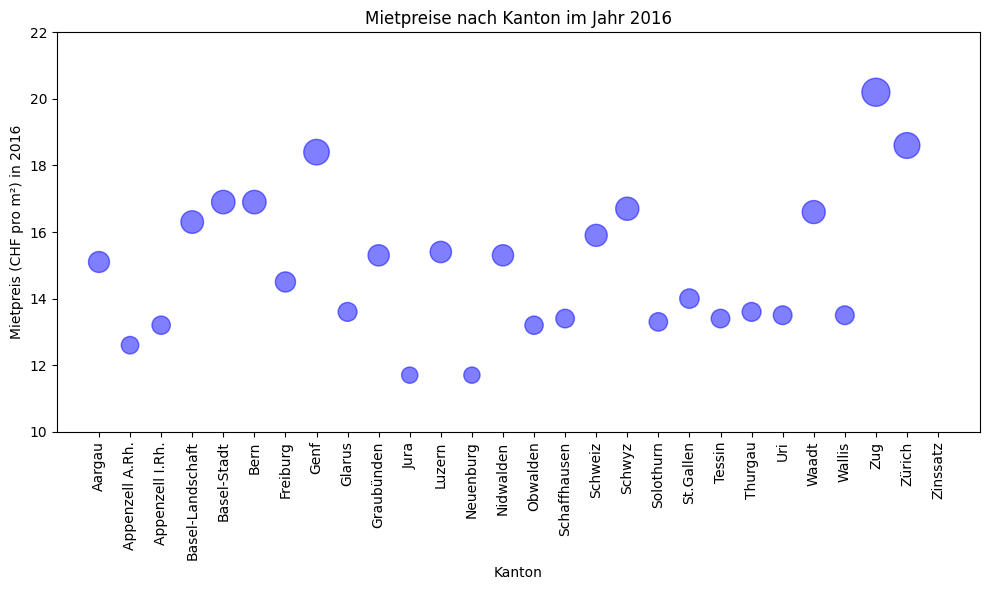

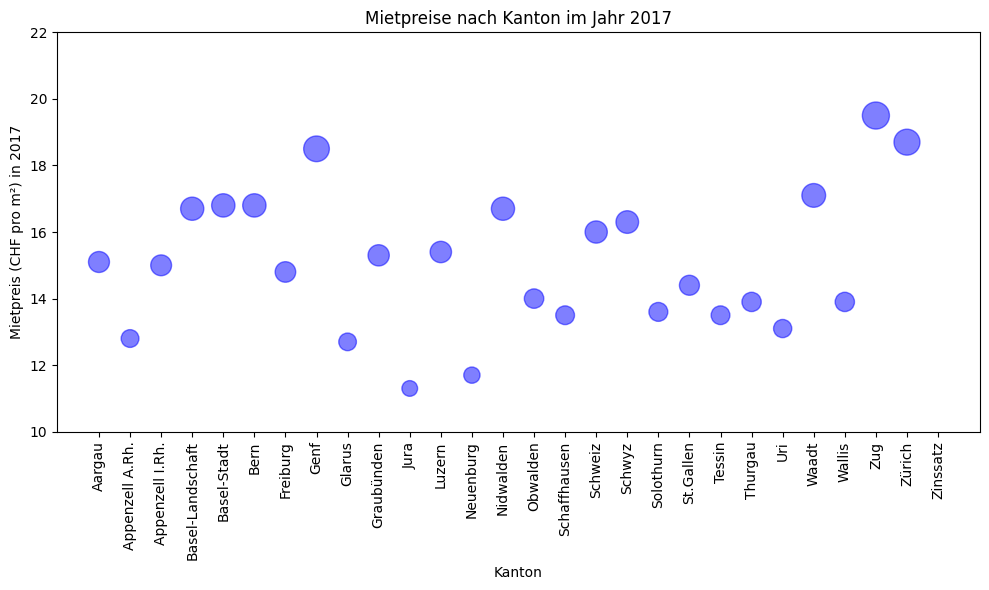

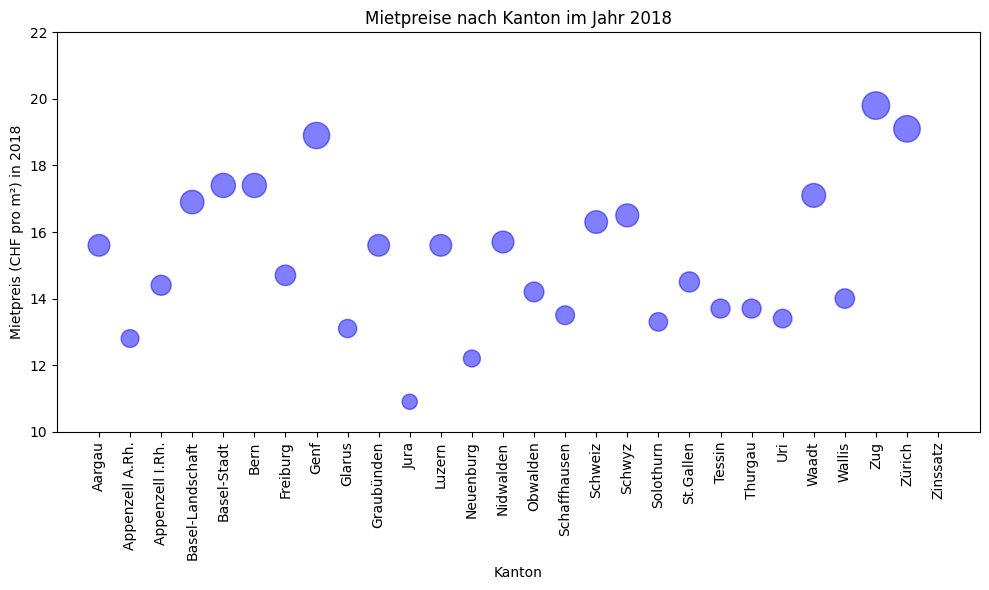

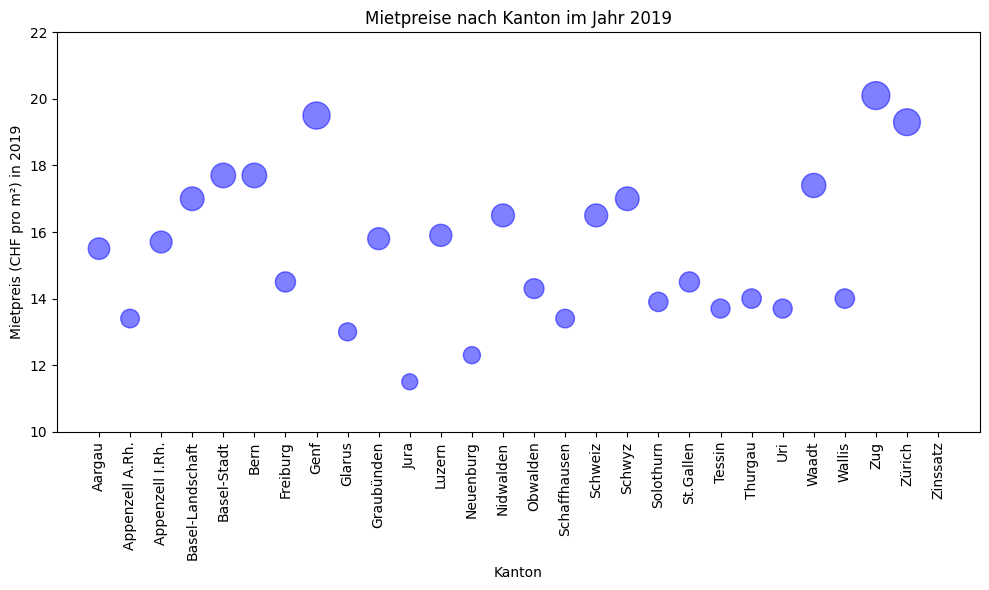

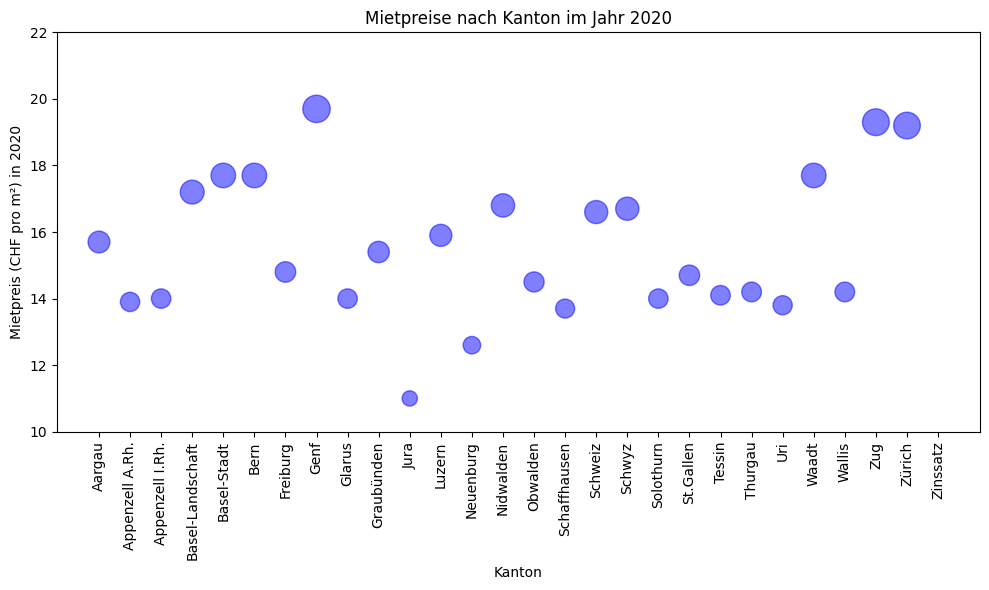

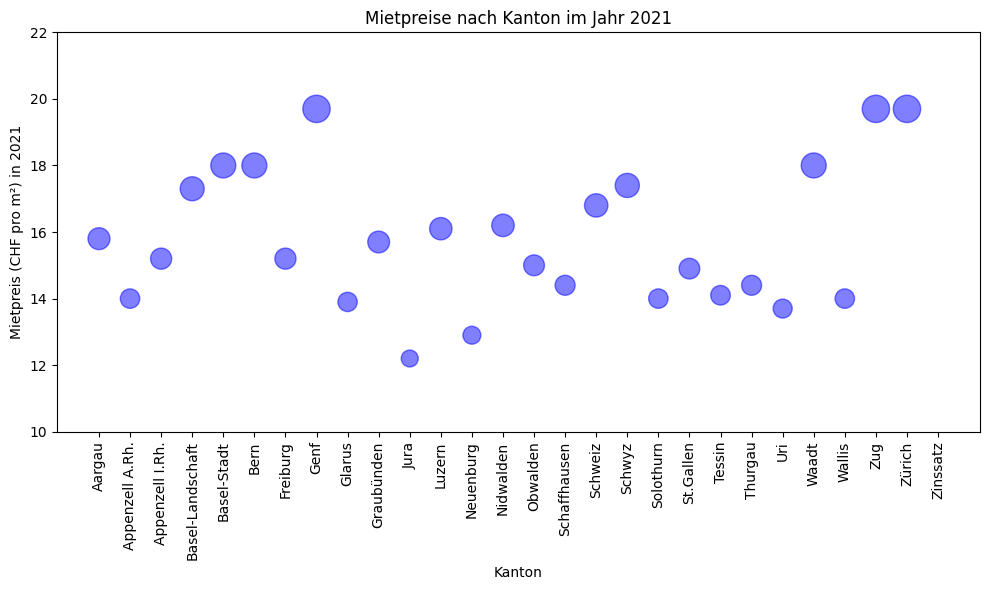

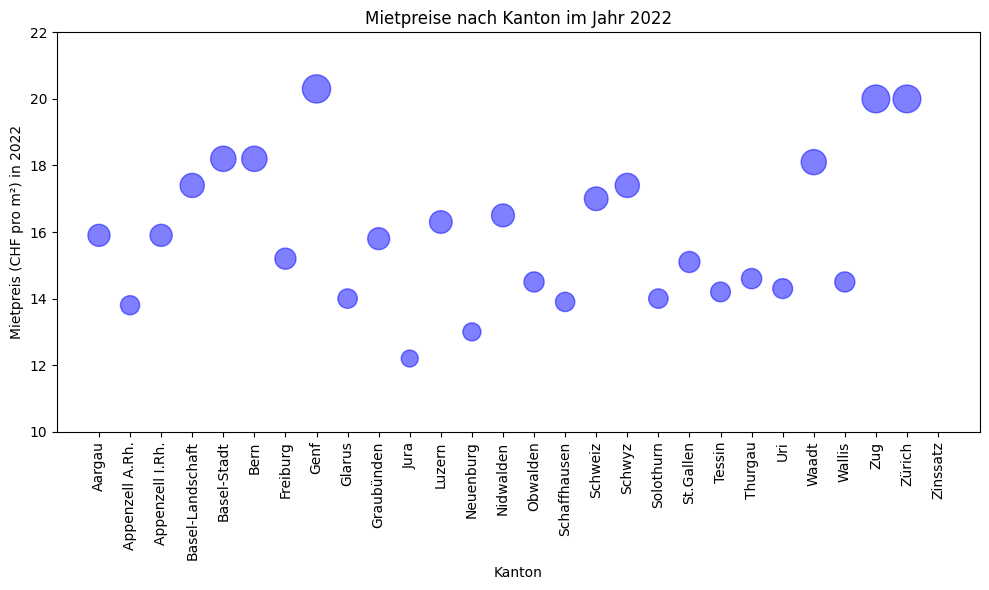

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Vorannahme: 'df' ist dein DataFrame

for Y in range(2012, 2023):
    # Korrigiere die Namen der Spalten
    spaltennamen = df.columns.tolist()
    korrigierte_spaltennamen = {str(spalte): spalte for spalte in spaltennamen}

    korrigierter_kanton_name = korrigierte_spaltennamen.get('Kanton', 'Kanton')
    korrigierter_jahr_name = korrigierte_spaltennamen.get(str(Y), next((name for name in korrigierte_spaltennamen if str(Y) in str(name)), None))

    # Berechne die Größen für die Scatterplot-Punkte basierend auf Mietpreis pro m²
    # Hier setzen wir die Punktgröße gleich dem Mietpreis pro m²
    punktgroessen = df[korrigierter_jahr_name]  # Dies sollte eine Serie oder Liste von Werten sein, keine einzelne Variable

    # Erstelle den Scatterplot
    plt.figure(figsize=(10, 6), facecolor='none')  # Hintergrund der Figure transparent machen
    plt.scatter(df[korrigierter_kanton_name], df[korrigierter_jahr_name], color='blue', s=punktgroessen*punktgroessen, alpha=0.5)  # Verwende die Mietpreise als Punktgrößen und mache die Punkte transparent
    plt.title(f'Mietpreise nach Kanton im Jahr {Y}')
    plt.xlabel(korrigierter_kanton_name)
    plt.ylabel(f'Mietpreis (CHF pro m²) in {korrigierter_jahr_name}')
    plt.xticks(rotation=90)
    plt.ylim(10, 22)  # Setze die Grenzen der Y-Achse fest
    plt.tight_layout()
    plt.show()


####2.1.2 Jährliche Schwankungen pro Kanton (Liniendiagramme)

##### Vergleich alle Kantone vs. Gesamtschweiz

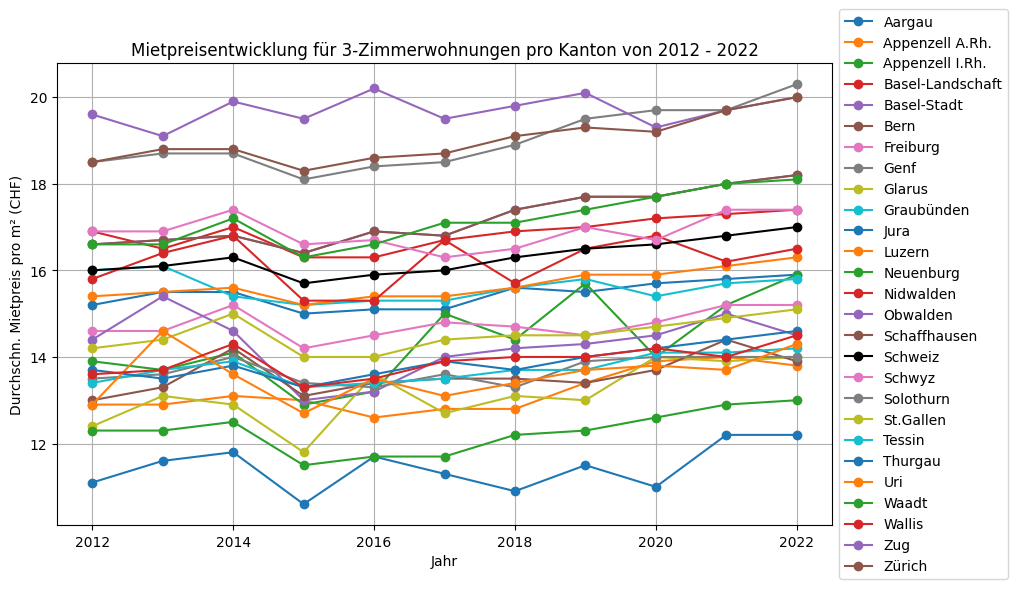

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel einlesen
excel_path = 'https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreis_BERR-Zins.xlsx'
df = pd.read_excel(excel_path, index_col=0)

# Die letzte Zeile "Zinssatz" entfernen
df = df.drop("Zinssatz")

# Diagramm erstellen
plt.figure(figsize=(10, 6))

# Sortiere die Kantone alphabetisch für die Legende
sorted_df = df.sort_index()

# Plot für jeden Kanton
for i in range(len(sorted_df)):
    if sorted_df.index[i] == "Schweiz":
        plt.plot(df.columns, sorted_df.iloc[i, :], marker='o', color='black', label=sorted_df.index[i])
    else:
        plt.plot(df.columns, sorted_df.iloc[i, :], marker='o', label=sorted_df.index[i])

plt.title('Mietpreisentwicklung für 3-Zimmerwohnungen pro Kanton von 2012 - 2022')
plt.xlabel('Jahr')
plt.ylabel('Durchschn. Mietpreis pro m² (CHF)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

**Beschreibung der Grafik und Auffälligkeiten**: Jeder Linie repräsentiert einen Kanton, wobei die Durchschnittsmietpreise pro Quadratmeter (in CHF) über die Jahre aufgetragen sind. Der Durchschnitt der Gesamtschweiz ist aufgrund der Sichbarkeit in schwarz abgebildet. Es fällt auf, dass einige teurere Kantone den Durchschnitt der Gesamtschweiz nach oben ziehen. Die Mehrheit der Kantone ist unter dem Durchschnitt der Gesamtschweiz. Um die Kantone besser vergleichen zu können werden in den nachfolgenden Grafiken die Top 5 der teuersten sowie der günstigen Kantone verglichen.

##### Vergleich alle Kantone vs. Gesamtschweiz (Version 2 interaktiv)

In [6]:
import pandas as pd
import plotly.graph_objs as go

# Excel einlesen
excel_path = 'https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreis_BERR-Zins.xlsx'
df = pd.read_excel(excel_path, index_col=0)

# Die letzte Zeile "Zinssatz" entfernen
df = df.drop("Zinssatz")

# Sortiere die Kantone alphabetisch für die Legende
sorted_df = df.sort_index()

# Plotly-Daten für die Kantone erstellen
data = []

# Plot für jeden Kanton außer "Schweiz"
for i in range(len(sorted_df)):
    if sorted_df.index[i] != "Schweiz":
        trace = go.Scatter(x=df.columns, y=sorted_df.iloc[i, :], mode='lines+markers', name=sorted_df.index[i], opacity=0.5)
        data.append(trace)

# Plot für "Schweiz" (in Schwarz und überlagernd)
switzerland_trace = go.Scatter(x=df.columns, y=sorted_df.loc["Schweiz", :], mode='lines+markers', name="Schweiz", line=dict(color='black', width=2))
data.append(switzerland_trace)

# Layout erstellen
layout = go.Layout(
    title='Mietpreisentwicklung für 3-Zimmerwohnungen pro Kanton von 2012 - 2022',
    xaxis=dict(title='Jahr'),
    yaxis=dict(title='Durchschn. Mietpreis pro m² (CHF)'),
    legend=dict(x=1, y=0.5),
    hovermode='closest',
    width=1500,  # Breite der Grafik anpassen
    height=1000   # Höhe der Grafik anpassen
)

# Grafik erstellen
fig = go.Figure(data=data, layout=layout)

# Grafik anzeigen
fig.show()

##### Boxplot Mietpreise pro Kanton und Jahr

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel einlesen
excel_path = 'https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreis_BERR-Zins.xlsx'
df = pd.read_excel(excel_path, index_col=0)

#Spalten und Zeilen tauschen (für Boxplot)
df_transformed = df.T

# Die letzte Zeile "Zinssatz" entfernen
df_transformed = df_transformed.drop("Zinssatz", axis=1)

df_transformed.head()

Kanton,Aargau,Appenzell A.Rh.,Appenzell I.Rh.,Basel-Landschaft,Basel-Stadt,Bern,Freiburg,Genf,Glarus,Graubünden,...,Schwyz,Solothurn,St.Gallen,Tessin,Thurgau,Uri,Waadt,Wallis,Zug,Zürich
2022,15.9,13.8,15.9,17.4,18.2,18.2,15.2,20.3,14.0,15.8,...,17.4,14.0,15.1,14.2,14.6,14.3,18.1,14.5,20.0,20.0
2021,15.8,14.0,15.2,17.3,18.0,18.0,15.2,19.7,13.9,15.7,...,17.4,14.0,14.9,14.1,14.4,13.7,18.0,14.0,19.7,19.7
2020,15.7,13.9,14.0,17.2,17.7,17.7,14.8,19.7,14.0,15.4,...,16.7,14.0,14.7,14.1,14.2,13.8,17.7,14.2,19.3,19.2
2019,15.5,13.4,15.7,17.0,17.7,17.7,14.5,19.5,13.0,15.8,...,17.0,13.9,14.5,13.7,14.0,13.7,17.4,14.0,20.1,19.3
2018,15.6,12.8,14.4,16.9,17.4,17.4,14.7,18.9,13.1,15.6,...,16.5,13.3,14.5,13.7,13.7,13.4,17.1,14.0,19.8,19.1


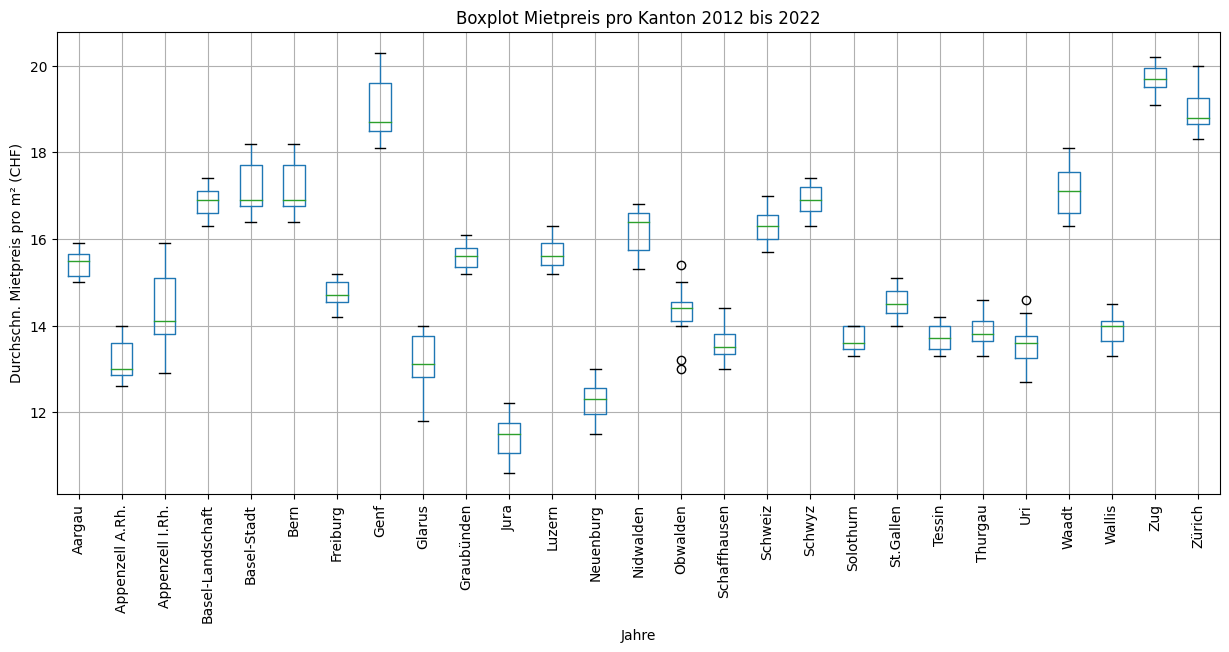

In [8]:
# Boxplot erstellen
df_transformed.boxplot(rot=90, figsize=(15, 6))
plt.title('Boxplot Mietpreis pro Kanton 2012 bis 2022')
plt.xlabel('Jahre')
plt.ylabel('Durchschn. Mietpreis pro m² (CHF)')
plt.show()

##### Top 5 teuerste Kantone vs. Gesamtschweiz

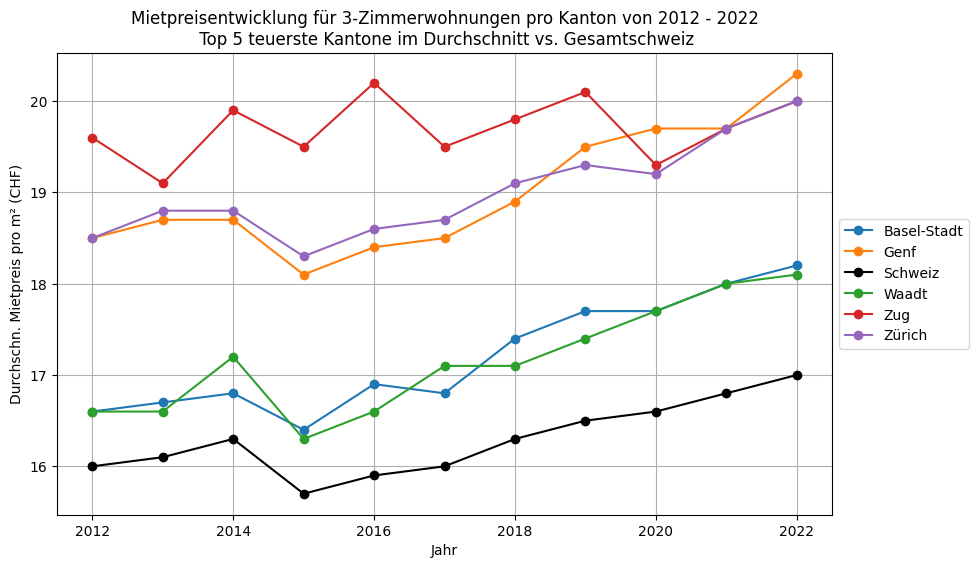

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten als DataFrame einlesen
data = {
"Kanton": ["Schweiz","Zürich","Bern","Luzern","Uri","Schwyz","Obwalden","Nidwalden","Glarus","Zug","Freiburg","Solothurn","Basel-Stadt","Basel-Landschaft","Schaffhausen","Appenzell A.Rh.","Appenzell I.Rh.","St.Gallen","Graubünden","Aargau","Thurgau","Tessin","Waadt","Wallis","Neuenburg","Genf","Jura"],
2022: [17 , 20 , 15.4 , 16.3 , 14.3 , 17.4 , 14.5 , 16.5 , 14 , 20 , 15.2 , 14 , 18.2 , 17.4 , 13.9 , 13.8 , 15.9 , 15.1 , 15.8 , 15.9 , 14.6 , 14.2 , 18.1 , 14.5 , 13 , 20.3 , 12.2],
2021: [16.8 , 19.7 , 15.3 , 16.1 , 13.7 , 17.4 , 15 , 16.2 , 13.9 , 19.7 , 15.2 , 14 , 18 , 17.3 , 14.4 , 14 , 15.2 , 14.9 , 15.7 , 15.8 , 14.4 , 14.1 , 18 , 14 , 12.9 , 19.7 , 12.2],
2020: [16.6 , 19.2 , 15.2 , 15.9 , 13.8 , 16.7 , 14.5 , 16.8 , 14 , 19.3 , 14.8 , 14 , 17.7 , 17.2 , 13.7 , 13.9 , 14 , 14.7 , 15.4 , 15.7 , 14.2 , 14.1 , 17.7 , 14.2 , 12.6 , 19.7 , 11],
2019: [16.5 , 19.3 , 15.1 , 15.9 , 13.7 , 17 , 14.3 , 16.5 , 13 , 20.1 , 14.5 , 13.9 , 17.7 , 17 , 13.4 , 13.4 , 15.7 , 14.5 ,15.8 , 15.5 , 14 , 13.7 , 17.4 , 14 , 12.3 , 19.5 , 11.5],
2018: [16.3 , 19.1 , 14.8 , 15.6 , 13.4 , 16.5 , 14.2 , 15.7 , 13.1 , 19.8 , 14.7 , 13.3 , 17.4 , 16.9 , 13.5 , 12.8 , 14.4 , 14.5 , 15.6 , 15.6 , 13.7 , 13.7 , 17.1 , 14 , 12.2 , 18.9 , 10.9],
2017: [16.0 , 18.7 , 14.5 , 15.4 , 13.1 , 16.3 , 14.0 , 16.7 , 12.7 , 19.5 , 14.8 , 13.6 , 16.8 , 16.7 , 13.5 , 12.8 ,  15.0  , 14.4 , 15.3 , 15.1 , 13.9 , 13.5 , 17.1 , 13.9 , 11.7 , 18.5 , 11.3],
2016: [15.9 , 18.6 , 14.5 , 15.4 , 13.5 , 16.7 , 13.2 , 15.3 , 13.6 , 20.2 , 14.5 , 13.3 , 16.9 , 16.3 , 13.4 , 12.6 ,  13.2  , 14.0 , 15.3 , 15.1 , 13.6 , 13.4 , 16.6 , 13.5 , 11.7 , 18.4 , 11.7],
2015: [15.7 , 18.3 , 14.3 , 15.2 , 12.7 , 16.6 , 13.0 , 15.3 , 11.8 , 19.5 , 14.2 , 13.4 , 16.4 , 16.3 , 13.1 , 13.0 ,  12.9  , 14.0 , 15.2 , 15.0 , 13.3 , 13.3 , 16.3 , 13.3 , 11.5 , 18.1 , 10.6],
2014: [16.3 , 18.8 , 15.0 , 15.6 , 13.6 , 17.4 , 14.6 , 16.8 , 12.9 , 19.9 , 15.2 , 14.0 , 16.8 , 17.0 , 14.2 , 13.1 ,  14.1  , 15.0 , 15.4 , 15.5 , 13.8 , 13.9 , 17.2 , 14.3 , 12.5 , 18.7 , 11.8],
2013: [16.1 , 18.8 , 14.6 , 15.5 , 14.6 , 16.9 , 15.4 , 16.4 , 13.1 , 19.1 , 14.6 , 13.6 , 16.7 , 16.5 , 13.3 , 12.9 ,  13.7  , 14.4 , 16.1 , 15.5 , 13.5 , 13.7 , 16.6 , 13.7 , 12.3 , 18.7 , 11.6],
2012: [16.0 , 18.5 , 15.0 , 15.4 , 12.9 , 16.9 , 14.4 , 15.8 , 12.4 , 19.6 , 14.6 , 13.5 , 16.6 , 16.9 , 13.0 , 12.9 ,  13.9  , 14.2 , 16.0 , 15.2 , 13.7 , 13.4 , 16.6 , 13.6 , 12.3 , 18.5 , 11.1]
}

# Daten in DataFrame konvertieren
df = pd.DataFrame(data)

# Nur die gewünschten Kantone auswählen
selected_kantone = ["Schweiz", "Zug", "Zürich", "Basel-Stadt", "Genf", "Waadt"]
df = df[df["Kanton"].isin(selected_kantone)]

# Kantone alphabetisch sortieren
sorted_df = df.sort_values(by="Kanton")

# Diagramm erstellen
plt.figure(figsize=(10, 6))
for i in range(len(sorted_df)):
    if sorted_df.iloc[i, 0] == "Schweiz":
        plt.plot(df.columns[1:], sorted_df.iloc[i, 1:], marker='o', color='black', label=sorted_df.iloc[i, 0])
    else:
        plt.plot(df.columns[1:], sorted_df.iloc[i, 1:], marker='o', label=sorted_df.iloc[i, 0])

plt.title('Mietpreisentwicklung für 3-Zimmerwohnungen pro Kanton von 2012 - 2022\n Top 5 teuerste Kantone im Durchschnitt vs. Gesamtschweiz')
plt.xlabel('Jahr')
plt.ylabel('Durchschn. Mietpreis pro m² (CHF)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

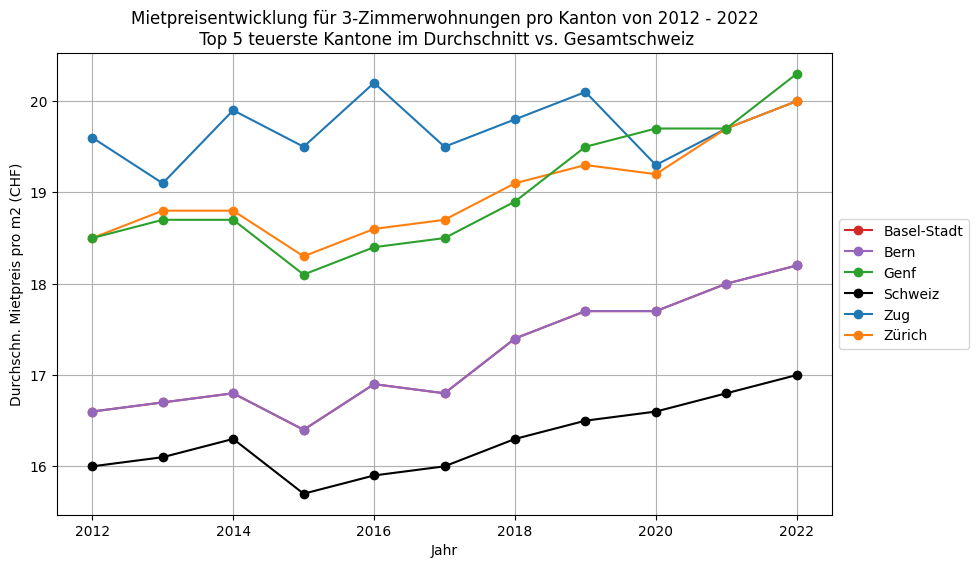

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel einlesen
excel_path = 'https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreis_BERR-Zins.xlsx'
df = pd.read_excel(excel_path, index_col=0)

# Mittelwert pro Zeile berechnen
df['Mittelwert'] = df.mean(axis=1)

# Sortiere nach dem Mittelwert und wähle die Top 5 aus
top_5 = df.nlargest(5, 'Mittelwert')

# Diagramm erstellen
plt.figure(figsize=(10, 6))

# Plot für die Zeile "Schweiz" (in schwarz)
plt.plot(df.columns[:-1], df.loc["Schweiz"][:-1], marker='o', color='black', label="Schweiz")

# Plot für die Top 5 Zeilen
for i in range(len(top_5)):
    if top_5.index[i] != "Schweiz":
        plt.plot(df.columns[:-1], top_5.iloc[i, :-1], marker='o', label=top_5.index[i])

# Legende alphabetisch sortieren
handles, labels = plt.gca().get_legend_handles_labels()
order = sorted(range(len(labels)), key=lambda k: labels[k])
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Mietpreisentwicklung für 3-Zimmerwohnungen pro Kanton von 2012 - 2022\n Top 5 teuerste Kantone im Durchschnitt vs. Gesamtschweiz')
plt.xlabel('Jahr')
plt.ylabel('Durchschn. Mietpreis pro m2 (CHF)')
plt.grid(True)
plt.show()

**Beschreibung der Grafik und Auffälligkeiten**: Beim Vergleich der Top 5 teuersten Kantone gegenüber dem Durchschnitt der Gesamtschweiz fällt auf, dass nicht alle Kantone den gleichen Verlauf haben. Der Kanton Zug ist meist der teuerste Kanton und schwankt fast jährlich nach oben und wieder nach unten. Die restlichen Kantone zeigen mehrheitlich einen ähnlichen Verlauf wie der Durchschnitt der Gesamtschweiz. Im Jahr 2015 ist ein Rückgang ersichtlich, danach steigen die durchschnittlichen Mietpreise für 3-Zimmerwohnungen wieder an.

##### Top 5 günstigste Kantone vs. Gesamtschweiz

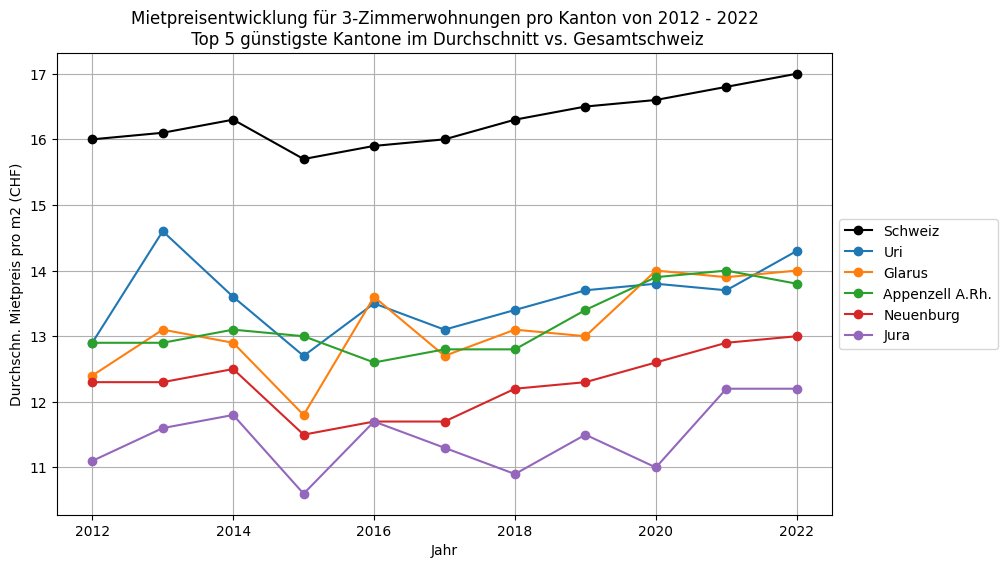

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten als DataFrame einlesen
data = {
"Kanton": ["Schweiz","Zürich","Bern","Luzern","Uri","Schwyz","Obwalden","Nidwalden","Glarus","Zug","Freiburg","Solothurn","Basel-Stadt","Basel-Landschaft","Schaffhausen","Appenzell A.Rh.","Appenzell I.Rh.","St.Gallen","Graubünden","Aargau","Thurgau","Tessin","Waadt","Wallis","Neuenburg","Genf","Jura"],
2022: [17 , 20 , 15.4 , 16.3 , 14.3 , 17.4 , 14.5 , 16.5 , 14 , 20 , 15.2 , 14 , 18.2 , 17.4 , 13.9 , 13.8 , 15.9 , 15.1 , 15.8 , 15.9 , 14.6 , 14.2 , 18.1 , 14.5 , 13 , 20.3 , 12.2],
2021: [16.8 , 19.7 , 15.3 , 16.1 , 13.7 , 17.4 , 15 , 16.2 , 13.9 , 19.7 , 15.2 , 14 , 18 , 17.3 , 14.4 , 14 , 15.2 , 14.9 , 15.7 , 15.8 , 14.4 , 14.1 , 18 , 14 , 12.9 , 19.7 , 12.2],
2020: [16.6 , 19.2 , 15.2 , 15.9 , 13.8 , 16.7 , 14.5 , 16.8 , 14 , 19.3 , 14.8 , 14 , 17.7 , 17.2 , 13.7 , 13.9 , 14 , 14.7 , 15.4 , 15.7 , 14.2 , 14.1 , 17.7 , 14.2 , 12.6 , 19.7 , 11],
2019: [16.5 , 19.3 , 15.1 , 15.9 , 13.7 , 17 , 14.3 , 16.5 , 13 , 20.1 , 14.5 , 13.9 , 17.7 , 17 , 13.4 , 13.4 , 15.7 , 14.5 ,15.8 , 15.5 , 14 , 13.7 , 17.4 , 14 , 12.3 , 19.5 , 11.5],
2018: [16.3 , 19.1 , 14.8 , 15.6 , 13.4 , 16.5 , 14.2 , 15.7 , 13.1 , 19.8 , 14.7 , 13.3 , 17.4 , 16.9 , 13.5 , 12.8 , 14.4 , 14.5 , 15.6 , 15.6 , 13.7 , 13.7 , 17.1 , 14 , 12.2 , 18.9 , 10.9],
2017: [16.0 , 18.7 , 14.5 , 15.4 , 13.1 , 16.3 , 14.0 , 16.7 , 12.7 , 19.5 , 14.8 , 13.6 , 16.8 , 16.7 , 13.5 , 12.8 ,  15.0  , 14.4 , 15.3 , 15.1 , 13.9 , 13.5 , 17.1 , 13.9 , 11.7 , 18.5 , 11.3],
2016: [15.9 , 18.6 , 14.5 , 15.4 , 13.5 , 16.7 , 13.2 , 15.3 , 13.6 , 20.2 , 14.5 , 13.3 , 16.9 , 16.3 , 13.4 , 12.6 ,  13.2  , 14.0 , 15.3 , 15.1 , 13.6 , 13.4 , 16.6 , 13.5 , 11.7 , 18.4 , 11.7],
2015: [15.7 , 18.3 , 14.3 , 15.2 , 12.7 , 16.6 , 13.0 , 15.3 , 11.8 , 19.5 , 14.2 , 13.4 , 16.4 , 16.3 , 13.1 , 13.0 ,  12.9  , 14.0 , 15.2 , 15.0 , 13.3 , 13.3 , 16.3 , 13.3 , 11.5 , 18.1 , 10.6],
2014: [16.3 , 18.8 , 15.0 , 15.6 , 13.6 , 17.4 , 14.6 , 16.8 , 12.9 , 19.9 , 15.2 , 14.0 , 16.8 , 17.0 , 14.2 , 13.1 ,  14.1  , 15.0 , 15.4 , 15.5 , 13.8 , 13.9 , 17.2 , 14.3 , 12.5 , 18.7 , 11.8],
2013: [16.1 , 18.8 , 14.6 , 15.5 , 14.6 , 16.9 , 15.4 , 16.4 , 13.1 , 19.1 , 14.6 , 13.6 , 16.7 , 16.5 , 13.3 , 12.9 ,  13.7  , 14.4 , 16.1 , 15.5 , 13.5 , 13.7 , 16.6 , 13.7 , 12.3 , 18.7 , 11.6],
2012: [16.0 , 18.5 , 15.0 , 15.4 , 12.9 , 16.9 , 14.4 , 15.8 , 12.4 , 19.6 , 14.6 , 13.5 , 16.6 , 16.9 , 13.0 , 12.9 ,  13.9  , 14.2 , 16.0 , 15.2 , 13.7 , 13.4 , 16.6 , 13.6 , 12.3 , 18.5 , 11.1]
}

# Daten in DataFrame konvertieren
df = pd.DataFrame(data)

# Nur die gewünschten Kantone auswählen
selected_kantone = ["Schweiz", "Uri", "Glarus", "Appenzell A.Rh.", "Neuenburg", "Jura"]
df = df[df["Kanton"].isin(selected_kantone)]

# Kantone alphabetisch sortieren
sorted_df = df.sort_values(by="Kanton")

# Diagramm erstellen
plt.figure(figsize=(10, 6))
for i in range(len(df)):
    if df.iloc[i, 0] == "Schweiz":
        plt.plot(df.columns[1:], df.iloc[i, 1:], marker='o', color='black', label=df.iloc[i, 0])
    else:
        plt.plot(df.columns[1:], df.iloc[i, 1:], marker='o', label=df.iloc[i, 0])
plt.title('Mietpreisentwicklung für 3-Zimmerwohnungen pro Kanton von 2012 - 2022\n Top 5 günstigste Kantone im Durchschnitt vs. Gesamtschweiz')
plt.xlabel('Jahr')
plt.ylabel('Durchschn. Mietpreis pro m2 (CHF)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

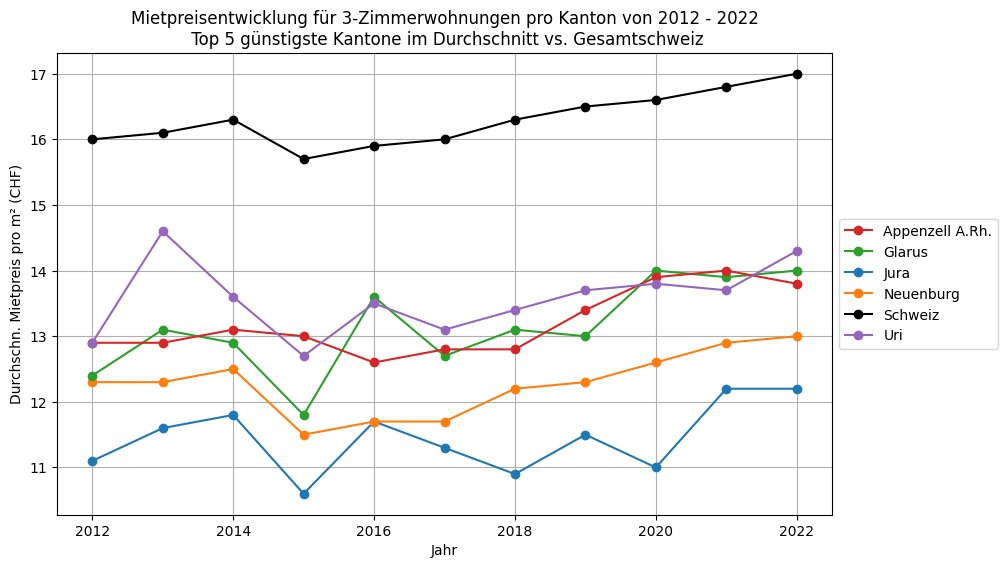

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel einlesen
excel_path = 'https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreis_BERR-Zins.xlsx'
df = pd.read_excel(excel_path, index_col=0)

# Die letzte Zeile "Zinssatz" entfernen
df = df.drop("Zinssatz")

# Mittelwert pro Zeile berechnen
df['Mittelwert'] = df.mean(axis=1)

# Sortiere nach dem Mittelwert und wähle die Bottom 5 aus
bottom_5 = df.nsmallest(5, 'Mittelwert')

# Diagramm erstellen
plt.figure(figsize=(10, 6))

# Plot für die Zeile "Schweiz" (in schwarz)
plt.plot(df.columns[:-1], df.loc["Schweiz"][:-1], marker='o', color='black', label="Schweiz")

# Plot für die Bottom 5 Zeilen
for i in range(len(bottom_5)):
    if bottom_5.index[i] != "Schweiz":
        plt.plot(df.columns[:-1], bottom_5.iloc[i, :-1], marker='o', label=bottom_5.index[i])

# Legende alphabetisch sortieren
handles, labels = plt.gca().get_legend_handles_labels()
order = sorted(range(len(labels)), key=lambda k: labels[k])
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Mietpreisentwicklung für 3-Zimmerwohnungen pro Kanton von 2012 - 2022\n Top 5 günstigste Kantone im Durchschnitt vs. Gesamtschweiz')
plt.xlabel('Jahr')
plt.ylabel('Durchschn. Mietpreis pro m² (CHF)')
plt.grid(True)
plt.show()

**Beschreibung der Grafik und Auffälligkeiten**: Auch in dieser Grafik ist ersichtlich, dass alle Kantone bis auf Appenzell A.Rh. im Jahr einen Rückgang erfahren haben. Allgemein weisen die Kantone unterschiedliche Schwankungen auf. Neuenburg verläuft sehr ähnlich wie der Durchschnitt der Gesamtschweiz.

####2.1.3 Jährliche Schwankungen pro Kanton (Indexierung)

##### Vergleich alle Kantone vs. Gesamtschweiz

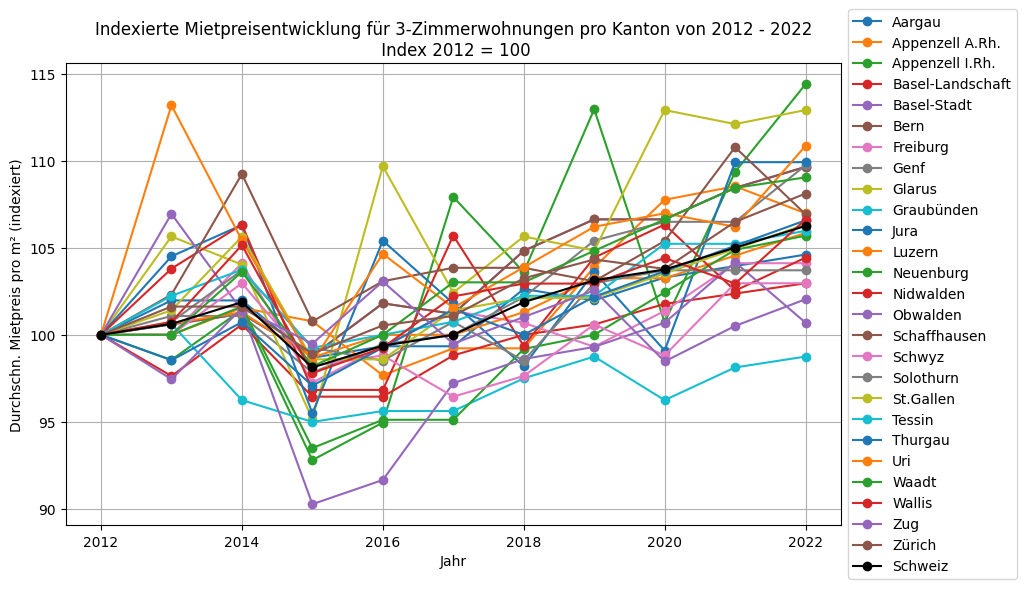

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel einlesen
excel_path = 'https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreis_BERR-Zins.xlsx'
df = pd.read_excel(excel_path, index_col=0)

# Die letzte Zeile "Zinssatz" entfernen
df = df.drop("Zinssatz")

# Kantone sortieren
sorted_df = df.sort_index()

# Wert für Index 2012 festlegen
index_2012 = {}

# Durchschnittlicher Mietpreis pro m² für 2012 berechnen
for kanton in sorted_df.index:
    index_2012[kanton] = sorted_df.loc[kanton, 2012]

# Indexierung und Normalisierung der Daten
for kanton in sorted_df.index:
    sorted_df.loc[kanton] = sorted_df.loc[kanton] / index_2012[kanton] * 100

# Diagramm erstellen
plt.figure(figsize=(10, 6))

# Plot für jeden Kanton außer "Schweiz"
for i in range(len(sorted_df)):
    if sorted_df.index[i] != "Schweiz":
        plt.plot(df.columns, sorted_df.iloc[i, :], marker='o', label=sorted_df.index[i])

# Plot für "Schweiz"
plt.plot(df.columns, sorted_df.loc["Schweiz", :], marker='o', color='black', label="Schweiz")

plt.title('Indexierte Mietpreisentwicklung für 3-Zimmerwohnungen pro Kanton von 2012 - 2022\n Index 2012 = 100')
plt.xlabel('Jahr')
plt.ylabel('Durchschn. Mietpreis pro m² (indexiert)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

##### Vergleich alle Kantone vs. Gesamtschweiz (Version 2 interaktiv)

In [14]:
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns

# Excel einlesen
excel_path = 'https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreis_BERR-Zins.xlsx'
df = pd.read_excel(excel_path, index_col=0)

# Die letzte Zeile "Zinssatz" entfernen
df = df.drop("Zinssatz")

# Kantone sortieren
sorted_df = df.sort_index()

# Wert für Index 2012 festlegen
index_2012 = {}

# Durchschnittlicher Mietpreis pro m² für 2012 berechnen
for kanton in sorted_df.index:
    index_2012[kanton] = sorted_df.loc[kanton, 2012]

# Indexierung und Normalisierung der Daten
for kanton in sorted_df.index:
    sorted_df.loc[kanton] = sorted_df.loc[kanton] / index_2012[kanton] * 100

# Plotly-Daten erstellen
data = []

# Plot für jeden Kanton
for i in range(len(sorted_df)):
    if sorted_df.index[i] != "Schweiz":
        trace = go.Scatter(x=df.columns, y=sorted_df.iloc[i, :], mode='lines+markers', name=sorted_df.index[i])
        data.append(trace)

# Plot für "Schweiz"
trace_schweiz = go.Scatter(x=df.columns, y=sorted_df.loc["Schweiz", :], mode='lines+markers', name="Schweiz", line=dict(color='black'))
data.append(trace_schweiz)

# Layout erstellen
layout = go.Layout(title='Indexierte Mietpreisentwicklung für 3-Zimmerwohnungen pro Kanton von 2012 - 2022\n Index 2012 = 100',
                   xaxis=dict(title='Jahr'),
                   yaxis=dict(title='Durchschn. Mietpreis pro m² (indexiert)'),
                   legend=dict(x=1, y=0.5))

# Grafik erstellen
fig = go.Figure(data=data, layout=layout)

# Grafik anzeigen
fig.show()

In [15]:
import pandas as pd
import plotly.graph_objs as go

# Excel einlesen
excel_path = 'https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreis_BERR-Zins.xlsx'
df = pd.read_excel(excel_path, index_col=0)

# Die letzte Zeile "Zinssatz" entfernen
df = df.drop("Zinssatz")

# Kantone sortieren
sorted_df = df.sort_index()

# Wert für Index 2012 festlegen
index_2012 = {}

# Durchschnittlicher Mietpreis pro m² für 2012 berechnen
for kanton in sorted_df.index:
    index_2012[kanton] = sorted_df.loc[kanton, 2012]

# Indexierung und Normalisierung der Daten
for kanton in sorted_df.index:
    sorted_df.loc[kanton] = sorted_df.loc[kanton] / index_2012[kanton] * 100

# Plotly-Daten erstellen
data = []

# Plot für jeden Kanton
for i in range(len(sorted_df)):
    if sorted_df.index[i] != "Schweiz":
        trace = go.Scatter(x=df.columns, y=sorted_df.iloc[i, :], mode='lines+markers', name=sorted_df.index[i])
        data.append(trace)

# Plot für "Schweiz"
trace_schweiz = go.Scatter(x=df.columns, y=sorted_df.loc["Schweiz", :], mode='lines+markers', name="Schweiz", line=dict(color='black'))
data.append(trace_schweiz)

# Layout erstellen
layout = go.Layout(title='Indexierte Mietpreisentwicklung für 3-Zimmerwohnungen pro Kanton von 2012 - 2022<br>Index 2012 = 100',
                   xaxis=dict(title='Jahr'),
                   yaxis=dict(title='Durchschn. Mietpreis pro m² (indexiert)'),
                   legend=dict(x=1, y=0.5),
                   width=1500,  # Breite der Grafik anpassen
                   height=1000  # Höhe der Grafik anpassen
                   )

# Grafik erstellen
fig = go.Figure(data=data, layout=layout)

# Grafik anzeigen
fig.show()

##### Top 5 teuerste Kantone vs. Gesamtschweiz

ValueError: could not convert string to float: 'Mittelwert'

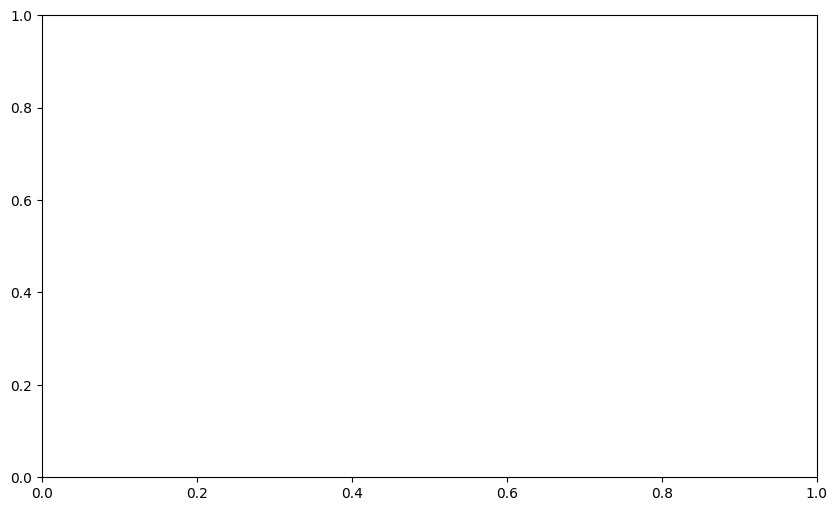

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel einlesen
excel_path = 'https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreis_BERR-Zins.xlsx'
df = pd.read_excel(excel_path, index_col=0)

# Die letzte Zeile "Zinssatz" entfernen
df = df.drop("Zinssatz", errors='ignore')  # Falls die Zeile nicht vorhanden ist, wird keine Fehlermeldung erzeugt

# Mittelwerte berechnen
df['Mittelwert'] = df.mean(axis=1)

# Kantone nach Mittelwert sortieren und die fünf Kantone mit den höchsten Mittelwerten sowie "Schweiz" auswählen
top_kantone = df.nlargest(6, 'Mittelwert')  # Die sechste Zeile ist 'Schweiz', daher nehmen wir die sechs Top-Kantone
top_kantone = top_kantone.drop("Schweiz", errors='ignore')   # Die Zeile 'Schweiz' entfernen, falls sie vorhanden ist

# Diagramm erstellen
plt.figure(figsize=(10, 6))

# Plot für jeden Kanton
for kanton in top_kantone.index:
    if kanton != "Mittelwert":  # Überprüfen, ob es sich nicht um die "Mittelwert"-Spalte handelt
        plt.plot(df.columns[1:], top_kantone.loc[kanton, df.columns[1]:].values, marker='o', label=kanton)

# Plot für "Schweiz", falls vorhanden
if "Schweiz" in df.index:
    plt.plot(df.columns[1:], df.loc["Schweiz", df.columns[1]:].values, marker='o', color='black', label="Schweiz")

plt.title('Indexierte Mietpreisentwicklung für 3-Zimmerwohnungen pro Kanton von 2012 - 2022\n Index 2012 = 100')
plt.xlabel('Jahr')
plt.ylabel('Durchschn. Mietpreis pro m² (indexiert)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

##### Top 5 günstigste Kantone vs. Gesamtschweiz

####2.1.4 Gruppierung und Geo-Mapping

####2.1.5 Time Similarity und Clustering

##### Upload und Vorbereitung

In [ ]:
#Setup installations
!pip install scikit-learn-extra

In [ ]:
#Load Libraries

from warnings import filterwarnings
filterwarnings("ignore")
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import scipy as sp
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids


# from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [ ]:
#Upload Data

df = pd.read_excel('https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreis_BERR-Zins.xlsx')

df.head()

In [ ]:
#Checkin Data Structure

df.info()

In [ ]:
# Making Kantone as İndex
df.index = df.iloc[:,0]

df = df.iloc[:, 1:]

df.head()

In [ ]:
#Zeile Zinssatz entfernen
df.drop(index='Zinssatz', inplace=True)
print(df)

In [ ]:
# Check for NULL values
df.isnull().sum()

##### **Clustering der durchschnittlichen Mietpreise/m2 nach Kanton mittels k-Means.**

Welche Kantone ähneln sich im Mietpreisniveau?

In [17]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)

# Clusterzuordnung für jede Zeile erhalten
df_analyse = df
clusters = kmeans.predict(df)

# Clusterzuordnung dem DataFrame hinzufügen
df['Cluster'] = clusters

# Ergebnis anzeigen
print(df)

NameError: name 'KMeans' is not defined

#####**Time Similarity & Clustering Mietpreis durchschnittlicher Mietpreis pro m2 (Euclidean Distance & k-Means**)

Welche Linienverläufe der Kantone sind identisch?


In [ ]:
#Import der Daten

#Upload Data

df = pd.read_excel('https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreis_BERR-Zins.xlsx')

df.head()

In [ ]:
# Making Kantone as İndex
df.index = df.iloc[:,0]

df = df.iloc[:, 1:]

df.head()

In [ ]:
#Zeile Zinssatz entfernen
df.drop(index='Zinssatz', inplace=True)
print(df)

In [ ]:
# Funktion zur Berechnung der Euclidean Distance
def euclidean_distance(row):
    return np.sqrt(np.sum(np.square(row - row.shift(1))))

# Berechnung der Euclidean Distance für jede Zeile (Kanton)
df['Euclidean_Distance'] = df.apply(euclidean_distance, axis=1)

print(df[['Euclidean_Distance']])

In [ ]:
from sklearn.cluster import KMeans

# Annahme: df ist dein DataFrame mit der Spalte 'Euclidean_Distance'

# Extrahiere die Euclidean_Distance-Werte als Features für das Clustering
X = df[['Euclidean_Distance']]

# Definiere die Anzahl der Cluster (hier 4)
num_clusters = 4

# Definiere und trainiere den k-means-Algorithmus
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Füge die zugehörigen Cluster-Zuordnungen zum DataFrame hinzu
df['Cluster'] = kmeans.labels_

# Ausgabe der geclusterten Daten
print(df)

In [ ]:
import matplotlib.pyplot as plt

# Annahme: df ist dein DataFrame mit den Spalten 'Euclidean_Distance' und 'Cluster'

# Erstelle eine Liste von Farben für die Scatterplots
colors = ['red', 'green', 'blue', 'orange', 'yellow']

# Erstelle einen Scatterplot für jede Gruppe
for cluster_label, color in zip(range(num_clusters), colors):
    # Filtere den DataFrame nach dem aktuellen Cluster
    cluster_df = df[df['Cluster'] == cluster_label]

    # Erstelle den Scatterplot für die Werte des aktuellen Clusters
    plt.scatter(cluster_df.index, cluster_df['Euclidean_Distance'], color=color, label=f'Cluster {cluster_label}')

# Plot-Einstellungen
plt.xlabel('Kanton')
plt.ylabel('Euclidean Distance')
plt.title('Scatterplot der Euclidean Distance nach Clustern')
plt.legend()
plt.xticks(rotation=90)  # Rotiere die Kanton-Namen für bessere Lesbarkeit
plt.tight_layout()

# Zeige den Plot an
plt.show()

###2b) Korrelation der Mietpreise mit dem hypothekarischen Referenzzinssatz sowie der Teuerung

####Schweizweit

#####Referenzzinssatz

In [ ]:
import pandas as pd
import numpy as np

# Daten von der URL laden
url = "https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreise_LIK_Zins_transponiert.xlsx"
daten = pd.read_excel(url)

# Spaltennamen anpassen, falls erforderlich
spalte1_name = 'Schweiz'
spalte2_name = 'Referenzzinssatz'

# Korrelationskoeffizient berechnen
korrelation = np.corrcoef(daten[spalte1_name], daten[spalte2_name])[0, 1]

print("Korrelationskoeffizient zwischen", spalte1_name, "und", spalte2_name, "ist:", korrelation)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten aus Excel-Datei laden
daten = pd.read_excel("https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreise_LIK_Zins_transponiert.xlsx")

# Spalten auswählen
x = daten['Schweiz']
y = daten['Referenzzinssatz']

# Streudiagramm erstellen
plt.scatter(x, y)
plt.title('Streudiagramm')
plt.xlabel('Mietpreise [CHF]')
plt.ylabel('Referenzzinssatz [Prozent]')
plt.xlim(15, 17.5)
plt.ylim(-1.5, 3)
plt.grid(True)
plt.show()

In [ ]:
# Daten aus Excel-Datei laden
daten = pd.read_excel("https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreise_LIK_Zins_transponiert.xlsx")

# Spalten auswählen
x = daten['Schweiz']
y = daten['Referenzzinssatz']

# Streudiagramm erstellen
plt.scatter(x, y, label='Datenpunkte')
plt.plot(x, y, color='r', linestyle='-', linewidth=1, label='Verbundene Linie')  # Linie zwischen den Punkten
plt.title('Streudiagramm mit verbundener Linie')
plt.xlabel('Mietpreise [CHF]')
plt.ylabel('Referenzzinssatz [Prozent]')
plt.xlim(15, 17.5)
plt.ylim(-1.5, 3)
plt.grid(True)
plt.legend()
plt.show()

#####LIK

In [ ]:
import pandas as pd
import numpy as np

# Daten von der URL laden
url = "https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreise_LIK_Zins_transponiert.xlsx"
daten = pd.read_excel(url)

# Spaltennamen anpassen, falls erforderlich
spalte1_name = 'Schweiz'
spalte2_name = 'LIK'

# Korrelationskoeffizient berechnen
korrelation = np.corrcoef(daten[spalte1_name], daten[spalte2_name])[0, 1]

print("Korrelationskoeffizient zwischen", spalte1_name, "und", spalte2_name, "ist:", korrelation)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten aus Excel-Datei laden
daten = pd.read_excel("https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreise_LIK_Zins_transponiert.xlsx")

# Spalten auswählen
x = daten['Schweiz']
y = daten['LIK']

# Streudiagramm erstellen
plt.scatter(x, y)
plt.title('Streudiagramm')
plt.xlabel('Mietpreise [CHF]')
plt.ylabel('LIK [Prozent]')
plt.xlim(15, 17.5)
plt.ylim(-1.5, 3)
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten aus Excel-Datei laden
daten = pd.read_excel("https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreise_LIK_Zins_transponiert.xlsx")

# Spalten auswählen
x = daten['Schweiz']
y = daten['LIK']

# Streudiagramm erstellen
plt.scatter(x, y, label='Datenpunkte')
plt.plot(x, y, color='r', linestyle='-', linewidth=1, label='Verbundene Linie')  # Linie zwischen den Punkten
plt.title('Streudiagramm mit verbundener Linie')
plt.xlabel('Mietpreise [CHF]')
plt.ylabel('LIK [Prozent]')
plt.xlim(15, 17.5)
plt.ylim(-1.5, 3)
plt.grid(True)
plt.legend()
plt.show()

####Kantonale Ebene

#####Referenzzinssatz

In [ ]:
import pandas as pd
import numpy as np

# Daten von der URL laden
url = "https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreise_LIK_Zins_transponiert.xlsx"
daten = pd.read_excel(url)

# Spaltennamen anpassen, falls erforderlich
spalte1_name = 'Referenzzinssatz'
spalte2_name = 'Zürich'
spalte3_name = 'Bern'

# Korrelationskoeffizient berechnen
korrelation = np.corrcoef(daten[spalte1_name], daten[spalte2_name])[0, 1]


print("Korrelationskoeffizient zwischen", spalte1_name, "und", spalte2_name, "ist:", korrelation)

In [ ]:
import pandas as pd
import numpy as np

# Daten aus Excel-Datei laden
daten = pd.read_excel("https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreise_LIK_Zins_transponiert.xlsx")

# Spalte, mit der verglichen werden soll
referenz_spalte = 'Referenzzinssatz'

# Liste der Spalten, mit denen verglichen werden soll
vergleich_spalten = ['Zürich', 'Bern', 'Luzern', 'Uri', 'Schwyz', 'Obwalden', 'Nidwalden', 'Glarus', 'Zug', 'Freiburg', 'Solothurn', 'Basel-Stadt', 'Basel-Landschaft', 'Schaffhausen', 'Appenzell A.Rh.', 'Appenzell I.Rh.', 'St.Gallen', 'Graubünden', 'Aargau', 'Thurgau', 'Tessin', 'Waadt', 'Wallis', 'Neuenburg', 'Genf', 'Jura' ]  # Fügen Sie hier weitere Spalten hinzu, falls erforderlich

# Korrelationskoeffizienten für jede Spalte berechnen
for spalte in vergleich_spalten:
    korrelation = np.corrcoef(daten[referenz_spalte], daten[spalte])[0, 1]
    print(f"Korrelationskoeffizient zwischen '{referenz_spalte}' und '{spalte}': {korrelation}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten aus Excel-Datei laden
daten = pd.read_excel("https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreise_LIK_Zins_transponiert.xlsx")

# Spalten auswählen
x = daten['Zürich']
y = daten['Referenzzinssatz']

# Streudiagramm erstellen
plt.scatter(x, y, label='Datenpunkte')
plt.plot(x, y, color='r', linestyle='-', linewidth=1, label='Verbundene Linie')  # Linie zwischen den Punkten
plt.title('Streudiagramm mit verbundener Linie')
plt.xlabel('Mietpreise [CHF]')
plt.ylabel('Referenzzinsatz [Prozent]')
plt.ylim(-1.5, 3)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten aus Excel-Datei laden
daten = pd.read_excel("https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreise_LIK_Zins_transponiert.xlsx")

# Spalten auswählen
x = daten['Bern']
y = daten['Referenzzinssatz']

# Streudiagramm erstellen
plt.scatter(x, y, label='Datenpunkte')
plt.plot(x, y, color='r', linestyle='-', linewidth=1, label='Verbundene Linie')  # Linie zwischen den Punkten
plt.title('Streudiagramm mit verbundener Linie')
plt.xlabel('Mietpreise [CHF]')
plt.ylabel('Referenzzinsatz [Prozent]')
plt.ylim(-1.5, 3)
plt.grid(True)
plt.legend()
plt.show()

###2c) Entwicklung der leerstehenden Wohnungen (1995-2023)

####Leerstehende Wohnungen Schweiz nach Jahr (absolute Werte)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


dataLeerstehend = pd.read_csv('https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Leerstehende_Wohnungen_Kantone.csv', header=None)

# zweite Zeile als neue Spaltenüberschriften verwenden
new_columns = dataLeerstehend.iloc[0]
dataLeerstehend.columns = new_columns

#erste Zeile löschen
dataLeerstehend = dataLeerstehend.drop(0)


dataLeerstehend.head()


In [ ]:
# Spalte Gemeindenummer entfernen
dataLeerstehend = dataLeerstehend.drop(['Gemeindenummer'], axis = 1)
dataLeerstehend.head()

In [ ]:
#Anzahl der Werte anzeigen
dataLeerstehend.count()

In [ ]:
#Boxplit nach Jahr erstellen mit mathplotlib
dataLeerstehend.boxplot(column=[1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], figsize=(20, 6))


plt.xlabel('Jahr')
plt.ylabel('Anzahl Leerstehende Wohnungen')
plt.title('Boxplot Anzahl Leerstehende Wohnungen (1995 bis 2023)')

####Leerwohnungsziffer nach Jahr und Kanton (prozentualer Anteil an Gesamtanzahl Wohnungen)

Unter der Leerwohnungsziffer versteht man den prozentualen Anteil der leer stehenden Wohnungen am Gesamtwohnungsbestand der registerbasierten Gebäude- und Wohnungsstatistik des Vorjahres.

#####Leerwohnungsziffer nach Jahre

In [ ]:
#Datenimport

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Leerwohnungsziffer_Kantone.csv', header=0)

Leerwohnungsziffer=df

Leerwohnungsziffer.head()


In [ ]:
#Boxplot erstellen mit Mathplotlib

Leerwohnungsziffer.boxplot(figsize=(20, 6))


plt.xlabel('Jahr')
plt.ylabel('Leerwohnungziffer (Anteil Gesamte Wohnungen)')
plt.title('Boxplot Leerhwohnungsziffer (1995 bis 2023)')


**Beschreibung der Grafik und Auffälligkeiten:** Die Grafik zeigt die Leerwohnungsziffer der gesamten Schweiz im Zeitraum von 1997 bis 2023 in Form eines Box-Plot. Der Median der leerstehenden Wohnungen in der Schweiz ist von 1997 bis 2004 gesunken. Ab 2014 stieg die Leerwohnungsziffer wieder an.

#####Leerwohnungsziffer nach Kantone

In [ ]:
#Transponieren der Tabelle (Kantone zu Spalten, da Boxplot für Spalten ausgelegt) und speicher eines neuen CSVs
Leerwohnungsziffer_Kanton = Leerwohnungsziffer.T

Leerwohnungsziffer_Kanton.to_csv('Leerwohnugsziffer_Kantone.csv', index=False)

In [ ]:
# Neues df aus CSV Datei erstellen

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Leerwohnugsziffer_Kantone_Spalten.csv', header=0)


Leerwohnungsziffer_Kanton=df


Leerwohnungsziffer_Kanton.head()

In [ ]:
#Daten der Grösse nach sortieren:

# neue Zeile Mittelwert einfügen
Leerwohnungsziffer_Kanton.loc['Mittelwert'] = Leerwohnungsziffer_Kanton.mean()

# Spalten nach dem Mittelwert sortieren und neues df generieren
Leerwohnungsziffer_Kanton = Leerwohnungsziffer_Kanton.sort_values(by='Mittelwert', axis=1)

Leerwohnungsziffer_Kanton.head()


In [ ]:
#  "Mittelwert"-Zeile entfernen, damit sie nicht im Boxplot erscheint

Leerwohnungsziffer_Kanton = Leerwohnungsziffer_Kanton.drop('Mittelwert')

Leerwohnungsziffer_Kanton.head()

In [ ]:
# "Kanton" entfernen, Zürich und Graubünden mit "ü" versehen
Leerwohnungsziffer_Kanton.columns = Leerwohnungsziffer_Kanton.columns.str.replace('Kanton ', '')

# "Ã¼" durch "ü" ersetzen
Leerwohnungsziffer_Kanton.columns = Leerwohnungsziffer_Kanton.columns.str.replace('Ã¼', 'ü')

In [ ]:
#Boxplot erstellen und vertikale Beschriftung einfügen
Leerwohnungsziffer_Kanton.boxplot(figsize=(20, 6))

plt.xticks(rotation='vertical')

plt.ylabel('Leerwohnungsziffer')
plt.title('Boxplot Leerwohnungsziffer nach Kanton (1997 bis 2023)')

**Beschreibung der Grafik und Auffälligkeiten:** Die Grafik zeigt die Leerwohnungsziffer je Kanton im Zeitraum von 1997 bis 2023 als Box-Plot. Betrachtet man den Median, hatte der Kanton Zug  in den letzten zwanzig Jahren die tiefste, der Kanton Solothurn die höchste Anzahl an leerstehenden Wohnungen.

In [ ]:
#Boxplot als interaktive Grafik (mit Plotly Bibliothek)

!pip install plotly

import plotly.express as px
import pandas as pd


# Erstelle den Boxplot mit Plotly
fig = px.box(Leerwohnungsziffer_Kanton)

# Achsenbeschriftungen hinzufügen
fig.update_layout(
    xaxis_title='Kanton',
    yaxis_title='Leerwohnungsziffer')

# Zeige den Boxplot an
fig.show()


###2d) Korrelation der Mietpreise pro m2 mit der Leerwohnungziffer (2012 bis 2022)

Verglichen werden die Mietpreise und die Leerwohnungsziffern je Kanton und Jahr im Zeitraum von 2012 bis 2022. Dabei werden zuerst die Daten importiert, formatiert und bereinigt. Anschliessend wird der Korrelationskoeffizient berechnet und die Korrelation via Scatterplot dargestellt.

####Datenimport und Datenaufbereitung

#####*Import der Daten zum Mietpreis pro m2*

In [ ]:
#Importieren der Excel-Datei
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


Mietpreise_raw = pd.read_excel("https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreis_BERR-Zins.xlsx", header=0)

#Zeile "Zinssatz" entfernen
Mietpreise_raw = Mietpreise_raw.drop(27)

Mietpreise_raw.head()

In [ ]:
print(Mietpreise_raw)

In [ ]:
#Matrix in Liste umwandeln
Mietpreise_list= Mietpreise_raw.melt(id_vars=['Kanton'], var_name='Jahr', value_name='Mietpreis pro m2')


Mietpreise_list.head()


In [ ]:
#Zeile "Schweiz" entfernen und Leerzeichen in St. Gallen einfügen

Mietpreise_list = Mietpreise_list[Mietpreise_list['Kanton'] != 'Schweiz']

# "St.Gallen" durch "St. Gallen" ersetzen
Mietpreise_list['Kanton'] = Mietpreise_list['Kanton'].replace('St.Gallen', 'St. Gallen')

In [ ]:
#Kontrolle ob Korrektur erfolgreich (in exportierten Excel)

Mietpreise_list.to_excel('Kontrolle.xlsx')

#####*Import der Daten zur Leerwohnungsziffer*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Leerwohnungsziffer_Kantone.csv', header=0)

Leerwohnungsziffer=df

Leerwohnungsziffer.head()


In [ ]:
#Werte ausserhalb von Zeiraum 2012 bis 2022 entfernen
columns_to_drop = Leerwohnungsziffer.columns[1:18].tolist() + [Leerwohnungsziffer.columns[29]]
Leerwohnungsziffer_bearb = Leerwohnungsziffer.drop(columns_to_drop, axis=1)

Leerwohnungsziffer_bearb.head()


In [ ]:
#Matrix in eine Liste umwandeln und Wert umbenennen zu Leerwohnungsziffer
Leerwohnungziffer_merge = Leerwohnungsziffer_bearb.melt(id_vars=['Kanton'], var_name='Jahr', value_name='Wert')
Leerwohnungziffer_merge['Kanton'] = Leerwohnungziffer_merge['Kanton'].str.replace('Kanton ', '', regex=False)

Leerwohnungziffer_merge = Leerwohnungziffer_merge.rename(columns={'Wert': 'Leerwohnungsziffer'})

Leerwohnungziffer_merge.head()

In [ ]:
Leerwohnungziffer_merge.to_excel('Leerwohnungsziffer.xlsx')

In [ ]:
# Datentyp von "Jahr" auf Int setzen

Leerwohnungziffer_merge['Jahr'] = Leerwohnungziffer_merge['Jahr'].astype(int)
Mietpreise_list['Jahr'] = Mietpreise_list['Jahr'].astype(int)


print("Datentyp der Spalte 'Jahr' in df1:", Leerwohnungziffer_merge['Jahr'].dtype)
print("Datentyp der Spalte 'Jahr' in df2:", Mietpreise_list['Jahr'].dtype)

#####*Mergen der beiden df*

In [ ]:
#Mergen der df's
merged_df = pd.merge(Leerwohnungziffer_merge, Mietpreise_list, on=['Kanton', 'Jahr'], how='outer')

# Reihenfolge der Spalten anpassen
merged_df = merged_df[['Jahr', 'Kanton', 'Leerwohnungsziffer', 'Mietpreis pro m2']]

merged_df.head()

In [ ]:
#Kontrolle ob gesamte zusammengeführte Liste ok (via Excel-Export)
merged_df.to_excel('Korrelation.xlsx')

In [ ]:
print(merged_df.dtypes)

####Datenauswertung

In folgendem Abschnitt werden die Daten ausgewertet und die Korrelation berechnete bzw. dargestellt.

#####*Korrelationskoeffizient pro Kanton*

(Korrelation zwischen den Leerwonhnungsziffern und den Mietpreisen je Kanton für alle Jahre)

In [ ]:
#Korrelation je Kanton berechnen
correlations_1 = merged_df.groupby('Kanton').apply(lambda x: np.corrcoef(x['Leerwohnungsziffer'], x['Mietpreis pro m2'])[0, 1])

print(correlations_1)

In [ ]:
#Säulendiagramm der Korrelationskoeffizienten nach Kanton darstellen
ax = correlations_1.plot(kind='bar', figsize=(12, 8))  # Größe des Plots
plt.title('Korrelation Mietpreis pro m2 vs. Leerwohnungsziffer (nach Kantone)', fontsize=16)  # Titel mit Schriftgröße
plt.xlabel('Kantone', fontsize=14)  # X-Achsenbeschriftung mit Schriftgröße
plt.ylabel('Korrelationskoeffizient', fontsize=14)  # Y-Achsenbeschriftung mit Schriftgröße

# Datenbeschriftungen hinzufügen
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='baseline')

plt.show()

#####*Korrelationskoeffizient pro Jahr*

(Korrelation zwischen den Leerwonhnungsziffern und den Mietpreisen aller Kantone pro Jahr)

In [ ]:
#Korrelation je Jahr berechnen
correlations_2 = merged_df.groupby('Jahr').apply(lambda x: np.corrcoef(x['Leerwohnungsziffer'], x['Mietpreis pro m2'])[0, 1])

print(correlations_2)

In [ ]:
#Säulendiagramm der Korrelationskoeffizienten nach Jahr darstellen
ax = correlations_2.plot(kind='bar', figsize=(8, 6))  # Größe des Plots
plt.title('Korrelation Mietpreis pro m2 vs. Leerwohnungsziffer (nach Jahre)', fontsize=10)  # Titel mit Schriftgröße
plt.xlabel('Jahr', fontsize=14)  # X-Achsenbeschriftung mit Schriftgröße
plt.ylabel('Korrelationskoeffizient', fontsize=14)  # Y-Achsenbeschriftung mit Schriftgröße

# Datenbeschriftungen hinzufügen
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='bottom')

plt.show()

#####*Scatterplot Korrelation Leerwohnungsziffer und Mietpreis pro m2 (Jahre und Kantone)*

In [ ]:
#Scatterplot erstellen mit Mathplotlib


merged_df.plot(kind="scatter",x="Mietpreis pro m2",y="Leerwohnungsziffer")
plt.title('Mietpreis pro m2 vs. Leerwohnungsziffer', fontsize=10)


**Beschreibung der Grafik und Auffälligkeiten:** Die Grafik zeigt die Korrelation zwischen der Leerwohnungziffer und dem Mietpreis pro m2 als Scatterplot auf. Es ist eine mittlere bis schwache, negative Korrelation erkennbar. Das bedeutet, dass eine geringere Anzahl an leerstehenden Wohnungen tendenziell mit höheren Mietpreisen pro m2 verbunden sind.

In [ ]:
#Scatterplot erstellen mit Seaborne

import seaborn as sns
import plotly.express as px
import pandas as pd


# Interaktiven Scatterplot mit plotly erstellen
fig = px.scatter(merged_df, x='Mietpreis pro m2', y='Leerwohnungsziffer', color='Jahr', title='Scatterplot Mietpreis, Leerwohnungsziffer 2010 bis 2022',  hover_data=['Jahr', 'Kanton', 'Leerwohnungsziffer', 'Mietpreis pro m2'])



fig.show()


##### Interaktiver Scatterplot (Filterung nach Kanton)

In [ ]:
import plotly.graph_objects as go
import pandas as pd


# Liste der verfügbaren Kantone
kantone = merged_df['Kanton'].unique()

# Dropdown-Menü erstellen
dropdown = go.layout.Updatemenu(
    buttons=list([
        dict(label=kanton,
             method="update",
             args=[{"visible": merged_df['Kanton'] == kanton},
                   {"title": f"Scatterplot für {kanton}"}])
        for kanton in kantone
    ]),
)

# Layout für den Plot definieren
layout = go.Layout(
    title='Scatterplot Mietpreis, Leerwohnungsziffer 2010 bis 2022',
    updatemenus=[dropdown],
)

# Scatterplot erstellen
fig = go.Figure(layout=layout)

for kanton in kantone:
    df_kanton = merged_df[merged_df['Kanton'] == kanton]
    fig.add_trace(go.Scatter(x=df_kanton['Mietpreis pro m2'],
                             y=df_kanton['Leerwohnungsziffer'],
                             mode='markers',
                             name=kanton))

fig.show()

**Beschreibung der Grafik und Auffälligkeiten**: Die Grafik zeigt ebenfalls die Korrelation zwischen der Leerwohnungziffer und dem Mietpreis pro m2 als Scatterplot auf. Allerdings als interaktive Grafik (Plotly)

In [ ]:
#Auswertung für Basel Stadt
import seaborn as sns
import plotly.express as px
import pandas as pd

fig = px.scatter(
    data_frame=merged_df[merged_df['Kanton'] == 'Basel-Stadt'],  # Filter für das Jahr 2022
    x='Mietpreis pro m2',
    y='Leerwohnungsziffer',
    title='Scatterplot Mietpreis, Leerwohnungsziffer Basel-Stadt',
    hover_data=['Jahr', 'Leerwohnungsziffer', 'Mietpreis pro m2']  # Hier werden die zusätzlichen Daten für den Hover-Text angegeben
)

fig.show()


---

##3) Diskussion und Ausblick

###Fazit

###Reflexion

###Ausblick

Notizen Antonia: Weitere Analyse:
- Wieso Zug anders schwankt als die anderen teuren Kantone
- Was war 2015?